## Analysis of the Survey
### KYTC SPR 20-582 
#### Evaluating the Safety Culture in KYTC Maintenance Crews

### Importing the Data and the required Libraries

In [14]:
import pandas as pd
import numpy as np
import openpyxl
from IPython.display import display, HTML
import matplotlib.pyplot as plt    #matplotlib: plotting library in python
import seaborn as sns
%matplotlib inline

In [16]:
# Read the survey data
df= pd.read_csv("KYTC Safety Climate Survey_May 4_Complete.csv", skiprows=[1,2], na_values='\\N')
df=df.drop(columns=['StartDate','EndDate','Status','IPAddress','Progress','Duration (in seconds)','RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage'])# to delete unnecessary columns
df.head()

,Finished,Q4,Q5,Q6,Q7,Q7_5_TEXT,Q7_6_TEXT,Q7_7_TEXT,Q8,Q9,...,Q43,Q46,Q47,Q48,Q50,Q51,Q52,Q53,Q54,Q55
0,True,District 10,Powell,30,"OSHA 10 Hour,Work Zone Traffic Control (WZTC),...",NaN,NaN,NaN,2-3 times,Agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,District 2,Hancock,16,"OSHA 10 Hour,Work Zone Traffic Control (WZTC),...",Supervisor Work Zone Traffic Control,NaN,NaN,2-3 times,Strongly agree,...,The management-employee safety committee activ...,Employees are continually encouraged and rewar...,There are formal systems for gathering injury/...,Safety-related communication efforts are forma...,Ongoing safety training is viewed as being cri...,Employees and supervisors are required to have...,Supervisor-led training as well as peer traini...,Training needs are typically identified by sup...,"Training for all employees, including all sub-...",Safety curriculum is developed and administere...
2,True,District 11,Bell,26,"OSHA 10 Hour,OSHA 30 Hour,Work Zone Traffic Co...",NaN,NaN,NaN,More than 5 times,Strongly agree,...,Safety committees are created only after an in...,Employees feel comfortable voicing concerns to...,Injury and illness data are collected for the ...,Safety-related communication efforts meet OSHA...,Only provides formal safety training as often ...,Employees and supervisors are required to have...,An off-the-shelf curriculum is used to meet OS...,Training needs are based on OSHA standards.,Training is verified only to the extent requir...,A formal safety curriculum is developed and ad...
3,True,District 1,Livingstone,23,"OSHA 10 Hour,Work Zone Traffic Control (WZTC),...",NaN,NaN,NaN,4-5 times,Neutral,...,The management-employee safety committee activ...,Safety communication is a two-way street. Empl...,Injury/incident data are regularly and formall...,Safety-related communication efforts are forma...,Ongoing safety training is viewed as being cri...,Employees are required to obtain the OSHA 10-h...,An off-the-shelf curriculum is used to meet OS...,Training needs are typically identified by sup...,"Training for all employees, including sub-cont...",Safety curriculum is developed by highly quali...
4,True,District 11,BELL,23,"OSHA 10 Hour,OSHA 30 Hour,Work Zone Traffic Co...",NaN,NaN,NaN,Never,Strongly agree,...,Safety committees are created only after an in...,Management isn't interested in and therefore d...,Injury and illness data are not collected unle...,Safety-related communication efforts occur onl...,Only provides formal safety training in respon...,Employees and supervisors are required to have...,The training that exists is aimed exclusively ...,Neither training nor training needs assessment...,Training cards or certificates are only invest...,"Because of job site experience alone, senior l..."


In [3]:
len(df)

143

In [17]:
# funtion to create an excel sheet/ Each Indicator will be saved in a sepaerate excel sheet with different sheets 
def multiple_dfs(df_list,sheets,file_name,spaces):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    #row = 0
    column=0
    for xls in sheets:
        for dataframe in df_list:
            dataframe.to_excel(writer,sheet_name=xls,startrow=0 , startcol=column)   
            #row = row + len(dataframe.index) + spaces + 1
            column=column+len(dataframe.columns)+spaces+1
        column=0
    writer.save()
#run function ( to run the above function, thsi will be part of the LI function)
#sheets=data_question
#multiple_dfs(dfs, sheets,'ERP.xlsx', 1)

In [18]:
Responses=df['Q4'].value_counts().sort_values().to_frame(name='Responses/District')
Responses # number of responses by each district 

,Responses/District
District 9,6
District 5,7
District 4,8
District 11,10
District 1,10
District 12,11
District 6,13
District 2,14
District 10,14
District 8,14


## Safety Climate Leading indicator: Employee Risk Perception {Q9-Q10-Q11-Q12-Q13-Q14-Q15}

In [6]:
# A function to recode Employye Risk Perception
def Recode_ERP(x): 
    if x =='Strongly disagree':
        return 5
    elif x =='Disagree':
        return 4
    elif x =='Neutral':
        return 3   
    elif x =='Agree':
        return 2
    elif x =='Strongly agree':
        return 1  
    else:
        return 

In [7]:
#Function to calcualte the sore of each question/District and Overall Score/LI/District and KYTC
def ERP (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_df=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame (will take Districts, indicator Question, and will add Score Column)
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_ERP)# to give a score for each sentence by applying recode function
    
    #3. Concat the data (to create a data frame for the indicator questions only) 
    Employee_Risk_Perception=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Employee_Risk_Perception.columns=['District', 'Rubric', 'Score']# Rename the columns 
    display(Employee_Risk_Perception)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank= Employee_Risk_Perception['Score'].groupby(Employee_Risk_Perception['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from the generated Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Employee Risk Perception across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['b'].value_counts() #will count the answers/Rubric for KYTC 
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Rubric','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Rubric',ascending=True)
    KYTC['Score']=(2,4,3,1,5)
    display(KYTC)
    Question_Score=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))# Score/question for KYTC 
    print('The score of this question is:',Question_Score,'.')
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Employee_Risk_Perception,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q9','Q10','Q11','Q12','Q13','Q14','Q15']
    multiple_dfs(dfs,sheets,'ERP.xlsx', 1)
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_P=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_P=KYTC_P.reset_index()
    #display(KYTC_P)
    KYTC_Per=pd.merge(KYTC,KYTC_P,left_index=True, right_index=True)
    KYTC_Per.rename(columns={'c':'%_Frequency'},inplace=True)                   
    display(KYTC_Per)
    Percentage_Agree=KYTC_Per.iat[0,4]
    Percentage_Disagree=KYTC_Per.iat[1,4]
    Percentage_Neutral=KYTC_Per.iat[2,4]
    Percentage_StronglyAgree=KYTC_Per.iat[3,4]
    Percentage_StronglyDisagree=KYTC_Per.iat[4,4]
    
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    display(District)
    #Return data that will be used upon calling the function in the for loop 
    return Employee_Risk_Perception,KYTC,Question_Score,Percentage_Agree,Percentage_Disagree,Percentage_Neutral,Percentage_StronglyAgree,Percentage_StronglyDisagree,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12

Answer for question: Q9


,District,Rubric,Score
105,District 1,Agree,2
116,District 1,Neutral,3
3,District 1,Neutral,3
114,District 1,Strongly agree,1
112,District 1,Agree,2
...,...,...,...
53,District 9,Agree,2
124,District 9,Neutral,3
72,District 9,Neutral,3
9,District 9,Strongly agree,1


,District,Score,Freq
0,District 1,2,6
1,District 1,3,3
2,District 1,1,1
3,District 10,2,10
4,District 10,1,2
5,District 10,3,1
6,District 10,5,1
7,District 11,1,2
8,District 11,4,1
9,District 11,2,4


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,22
1,District 10,30
2,District 11,23
3,District 12,26
4,District 2,30
5,District 3,44
6,District 4,17
7,District 5,14
8,District 6,27
9,District 7,40


,Rubric,TotalFreq,Score
0,Agree,69,2
3,Disagree,6,4
1,Neutral,34,3
2,Strongly agree,30,1
4,Strongly disagree,4,5


The score of this question is: 2.195804195804196 .


,Rubric,TotalFreq,Score,index,%_Frequency
0,Agree,69,2,2,48.252
3,Disagree,6,4,4,4.196
1,Neutral,34,3,3,23.776
2,Strongly agree,30,1,1,20.979
4,Strongly disagree,4,5,5,2.797


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,22,2.20,District 1 (n=10)
1,District 10,14,30,2.14,District 10 (n=14)
2,District 11,10,23,2.30,District 11 (n=10)
3,District 12,11,26,2.36,District 12 (n=11)
4,District 2,14,30,2.14,District 2 (n=14)
5,District 3,20,44,2.20,District 3 (n=20)
6,District 4,8,17,2.12,District 4 (n=8)
7,District 5,7,14,2.00,District 5 (n=7)
8,District 6,13,27,2.08,District 6 (n=13)
9,District 7,16,40,2.50,District 7 (n=16)


Answer for question: Q10


,District,Rubric,Score
105,District 1,Disagree,4
116,District 1,Neutral,3
3,District 1,Disagree,4
114,District 1,Strongly agree,1
112,District 1,Disagree,4
...,...,...,...
53,District 9,Disagree,4
124,District 9,Strongly disagree,5
72,District 9,Disagree,4
9,District 9,Strongly disagree,5


,District,Score,Freq
0,District 1,4,7
1,District 1,1,1
2,District 1,2,1
3,District 1,3,1
4,District 10,4,5
5,District 10,5,4
6,District 10,2,3
7,District 10,3,2
8,District 11,4,1
9,District 11,1,1


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,34
1,District 10,52
2,District 11,38
3,District 12,41
4,District 2,52
5,District 3,54
6,District 4,31
7,District 5,25
8,District 6,41
9,District 7,50


,Rubric,TotalFreq,Score
3,Agree,22,2
0,Disagree,49,4
2,Neutral,26,3
4,Strongly agree,13,1
1,Strongly disagree,33,5


The score of this question is: 3.4685314685314683 .


,Rubric,TotalFreq,Score,index,%_Frequency
3,Agree,22,2,2,15.385
0,Disagree,49,4,4,34.266
2,Neutral,26,3,3,18.182
4,Strongly agree,13,1,1,9.091
1,Strongly disagree,33,5,5,23.077


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,34,3.40,District 1 (n=10)
1,District 10,14,52,3.71,District 10 (n=14)
2,District 11,10,38,3.80,District 11 (n=10)
3,District 12,11,41,3.73,District 12 (n=11)
4,District 2,14,52,3.71,District 2 (n=14)
5,District 3,20,54,2.70,District 3 (n=20)
6,District 4,8,31,3.88,District 4 (n=8)
7,District 5,7,25,3.57,District 5 (n=7)
8,District 6,13,41,3.15,District 6 (n=13)
9,District 7,16,50,3.12,District 7 (n=16)


Answer for question: Q11


,District,Rubric,Score
105,District 1,Strongly disagree,5
116,District 1,Neutral,3
3,District 1,Strongly disagree,5
114,District 1,Strongly disagree,5
112,District 1,Strongly disagree,5
...,...,...,...
53,District 9,Strongly disagree,5
124,District 9,Disagree,4
72,District 9,Strongly disagree,5
9,District 9,Strongly disagree,5


,District,Score,Freq
0,District 1,5,5
1,District 1,4,4
2,District 1,3,1
3,District 10,5,10
4,District 10,4,2
5,District 10,2,1
6,District 10,3,1
7,District 11,5,5
8,District 11,4,3
9,District 11,1,1


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,44
1,District 10,63
2,District 11,41
3,District 12,50
4,District 2,66
5,District 3,84
6,District 4,34
7,District 5,32
8,District 6,58
9,District 7,66


,Rubric,TotalFreq,Score
3,Agree,3,2
1,Disagree,52,4
2,Neutral,8,3
4,Strongly agree,2,1
0,Strongly disagree,78,5


The score of this question is: 4.405594405594406 .


,Rubric,TotalFreq,Score,index,%_Frequency
3,Agree,3,2,2,2.098
1,Disagree,52,4,4,36.364
2,Neutral,8,3,3,5.594
4,Strongly agree,2,1,1,1.399
0,Strongly disagree,78,5,5,54.545


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,44,4.40,District 1 (n=10)
1,District 10,14,63,4.50,District 10 (n=14)
2,District 11,10,41,4.10,District 11 (n=10)
3,District 12,11,50,4.55,District 12 (n=11)
4,District 2,14,66,4.71,District 2 (n=14)
5,District 3,20,84,4.20,District 3 (n=20)
6,District 4,8,34,4.25,District 4 (n=8)
7,District 5,7,32,4.57,District 5 (n=7)
8,District 6,13,58,4.46,District 6 (n=13)
9,District 7,16,66,4.12,District 7 (n=16)


Answer for question: Q12


,District,Rubric,Score
105,District 1,Disagree,4
116,District 1,Agree,2
3,District 1,Neutral,3
114,District 1,Neutral,3
112,District 1,Neutral,3
...,...,...,...
53,District 9,Strongly agree,1
124,District 9,Neutral,3
72,District 9,Agree,2
9,District 9,Neutral,3


,District,Score,Freq
0,District 1,3,7
1,District 1,2,2
2,District 1,4,1
3,District 10,3,7
4,District 10,2,6
5,District 10,4,1
6,District 11,4,1
7,District 11,5,2
8,District 11,1,1
9,District 11,2,3


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,29
1,District 10,37
2,District 11,30
3,District 12,32
4,District 2,34
5,District 3,54
6,District 4,21
7,District 5,12
8,District 6,35
9,District 7,42


,Rubric,TotalFreq,Score
0,Agree,58,2
2,Disagree,20,4
1,Neutral,54,3
3,Strongly agree,8,1
4,Strongly disagree,3,5


The score of this question is: 2.664335664335664 .


,Rubric,TotalFreq,Score,index,%_Frequency
0,Agree,58,2,2,40.559
2,Disagree,20,4,4,13.986
1,Neutral,54,3,3,37.762
3,Strongly agree,8,1,1,5.594
4,Strongly disagree,3,5,5,2.098


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,29,2.90,District 1 (n=10)
1,District 10,14,37,2.64,District 10 (n=14)
2,District 11,10,30,3.00,District 11 (n=10)
3,District 12,11,32,2.91,District 12 (n=11)
4,District 2,14,34,2.43,District 2 (n=14)
5,District 3,20,54,2.70,District 3 (n=20)
6,District 4,8,21,2.62,District 4 (n=8)
7,District 5,7,12,1.71,District 5 (n=7)
8,District 6,13,35,2.69,District 6 (n=13)
9,District 7,16,42,2.62,District 7 (n=16)


Answer for question: Q13


,District,Rubric,Score
105,District 1,Strongly disagree,5
116,District 1,Agree,2
3,District 1,Disagree,4
114,District 1,Neutral,3
112,District 1,Neutral,3
...,...,...,...
53,District 9,Strongly agree,1
124,District 9,Neutral,3
72,District 9,Disagree,4
9,District 9,Strongly disagree,5


,District,Score,Freq
0,District 1,4,4
1,District 1,3,3
2,District 1,2,2
3,District 1,5,1
4,District 10,3,8
5,District 10,4,5
6,District 10,5,1
7,District 11,1,1
8,District 11,3,2
9,District 11,5,2


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,34
1,District 10,49
2,District 11,33
3,District 12,42
4,District 2,48
5,District 3,69
6,District 4,30
7,District 5,21
8,District 6,46
9,District 7,53


,Rubric,TotalFreq,Score
3,Agree,19,2
0,Disagree,54,4
1,Neutral,45,3
4,Strongly agree,4,1
2,Strongly disagree,21,5


The score of this question is: 3.4825174825174825 .


,Rubric,TotalFreq,Score,index,%_Frequency
3,Agree,19,2,2,13.287
0,Disagree,54,4,4,37.762
1,Neutral,45,3,3,31.469
4,Strongly agree,4,1,1,2.797
2,Strongly disagree,21,5,5,14.685


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,34,3.40,District 1 (n=10)
1,District 10,14,49,3.50,District 10 (n=14)
2,District 11,10,33,3.30,District 11 (n=10)
3,District 12,11,42,3.82,District 12 (n=11)
4,District 2,14,48,3.43,District 2 (n=14)
5,District 3,20,69,3.45,District 3 (n=20)
6,District 4,8,30,3.75,District 4 (n=8)
7,District 5,7,21,3.00,District 5 (n=7)
8,District 6,13,46,3.54,District 6 (n=13)
9,District 7,16,53,3.31,District 7 (n=16)


Answer for question: Q14


,District,Rubric,Score
105,District 1,Disagree,4
116,District 1,Neutral,3
3,District 1,Disagree,4
114,District 1,Strongly agree,1
112,District 1,Agree,2
...,...,...,...
53,District 9,Disagree,4
124,District 9,Disagree,4
72,District 9,Neutral,3
9,District 9,Strongly disagree,5


,District,Score,Freq
0,District 1,4,5
1,District 1,2,3
2,District 1,1,1
3,District 1,3,1
4,District 10,4,6
5,District 10,3,3
6,District 10,5,3
7,District 10,2,2
8,District 11,1,1
9,District 11,3,1


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,30
1,District 10,52
2,District 11,38
3,District 12,38
4,District 2,47
5,District 3,68
6,District 4,30
7,District 5,23
8,District 6,41
9,District 7,56


,Rubric,TotalFreq,Score
1,Agree,34,2
0,Disagree,51,4
2,Neutral,25,3
4,Strongly agree,8,1
3,Strongly disagree,25,5


The score of this question is: 3.3566433566433567 .


,Rubric,TotalFreq,Score,index,%_Frequency
1,Agree,34,2,2,23.776
0,Disagree,51,4,4,35.664
2,Neutral,25,3,5,17.483
4,Strongly agree,8,1,1,5.594
3,Strongly disagree,25,5,3,17.483


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,30,3.00,District 1 (n=10)
1,District 10,14,52,3.71,District 10 (n=14)
2,District 11,10,38,3.80,District 11 (n=10)
3,District 12,11,38,3.45,District 12 (n=11)
4,District 2,14,47,3.36,District 2 (n=14)
5,District 3,20,68,3.40,District 3 (n=20)
6,District 4,8,30,3.75,District 4 (n=8)
7,District 5,7,23,3.29,District 5 (n=7)
8,District 6,13,41,3.15,District 6 (n=13)
9,District 7,16,56,3.50,District 7 (n=16)


Answer for question: Q15


,District,Rubric,Score
105,District 1,Disagree,4
116,District 1,Neutral,3
3,District 1,Strongly disagree,5
114,District 1,Strongly disagree,5
112,District 1,Disagree,4
...,...,...,...
53,District 9,Disagree,4
124,District 9,Strongly disagree,5
72,District 9,Disagree,4
9,District 9,Strongly disagree,5


,District,Score,Freq
0,District 1,4,7
1,District 1,5,2
2,District 1,3,1
3,District 10,4,6
4,District 10,5,6
5,District 10,2,1
6,District 10,3,1
7,District 11,3,1
8,District 11,1,1
9,District 11,5,5


,District,Total_Freq
0,District 1,10
1,District 10,14
2,District 11,10
3,District 12,11
4,District 2,14
5,District 3,20
6,District 4,8
7,District 5,7
8,District 6,13
9,District 7,16


,District,Value
0,District 1,41
1,District 10,59
2,District 11,41
3,District 12,50
4,District 2,61
5,District 3,86
6,District 4,34
7,District 5,31
8,District 6,58
9,District 7,63


,Rubric,TotalFreq,Score
3,Agree,3,2
1,Disagree,57,4
2,Neutral,15,3
4,Strongly agree,2,1
0,Strongly disagree,66,5


The score of this question is: 4.2727272727272725 .


,Rubric,TotalFreq,Score,index,%_Frequency
3,Agree,3,2,2,2.098
1,Disagree,57,4,4,39.860
2,Neutral,15,3,3,10.490
4,Strongly agree,2,1,1,1.399
0,Strongly disagree,66,5,5,46.154


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,41,4.10,District 1 (n=10)
1,District 10,14,59,4.21,District 10 (n=14)
2,District 11,10,41,4.10,District 11 (n=10)
3,District 12,11,50,4.55,District 12 (n=11)
4,District 2,14,61,4.36,District 2 (n=14)
5,District 3,20,86,4.30,District 3 (n=20)
6,District 4,8,34,4.25,District 4 (n=8)
7,District 5,7,31,4.43,District 5 (n=7)
8,District 6,13,58,4.46,District 6 (n=13)
9,District 7,16,63,3.94,District 7 (n=16)


,Rubric,TotalFreq,Score
0,Agree,69,2
3,Disagree,6,4
1,Neutral,34,3
2,Strongly agree,30,1
4,Strongly disagree,4,5
3,Agree,22,2
0,Disagree,49,4
2,Neutral,26,3
4,Strongly agree,13,1
1,Strongly disagree,33,5


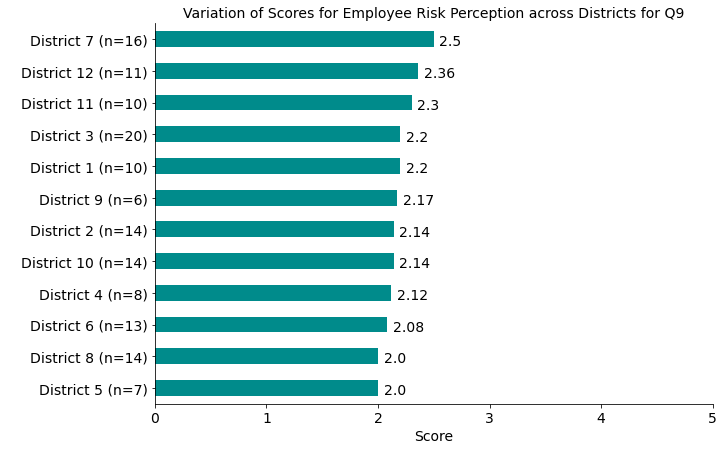

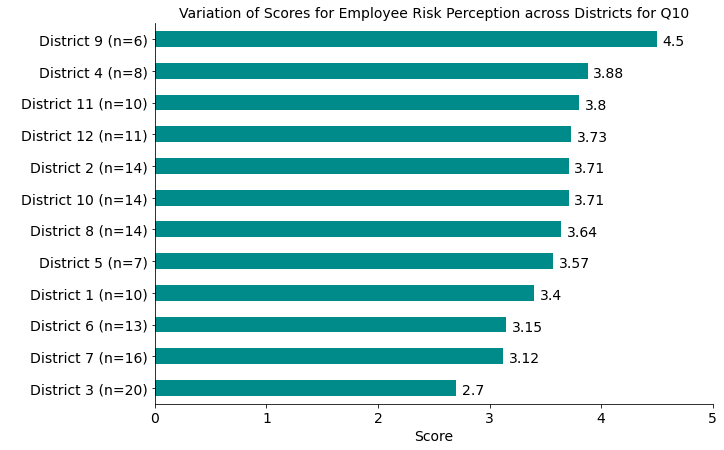

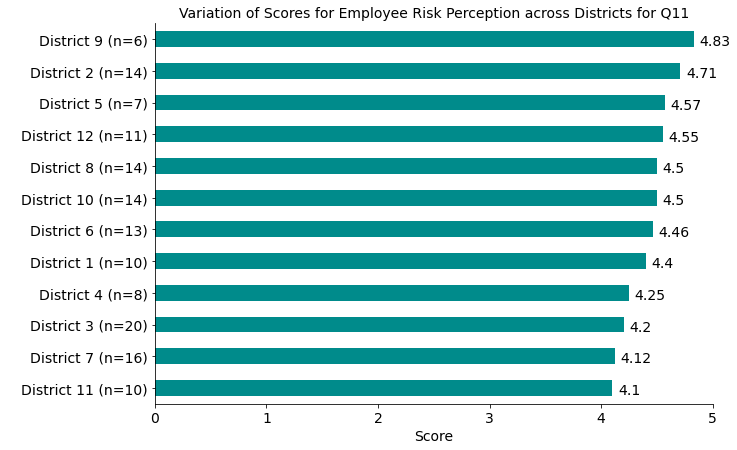

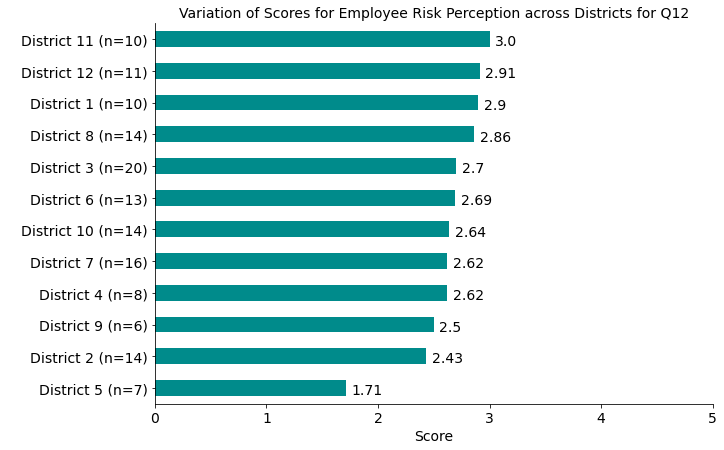

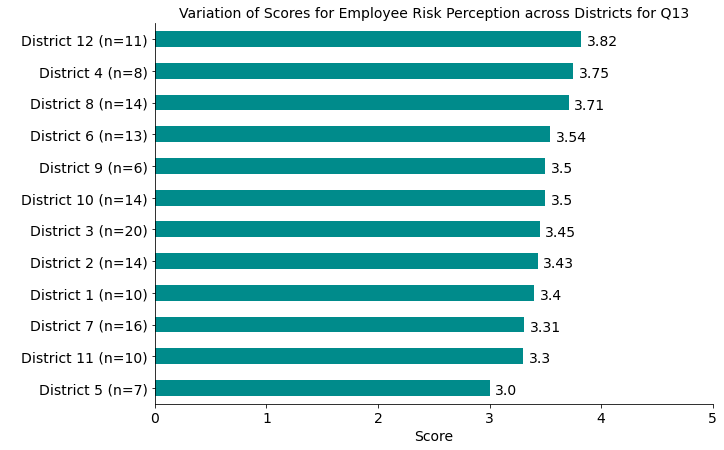

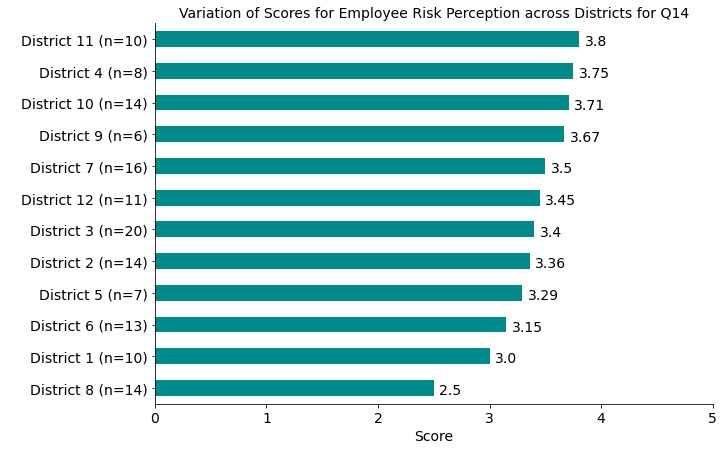

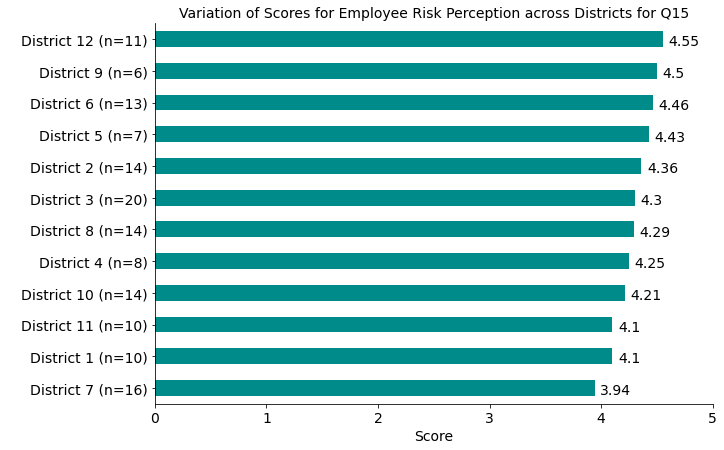

In [8]:
#For Loop to apply the Employee Risk Perception function  
questions = ['Q9','Q10','Q11','Q12','Q13','Q14','Q15']
EmployeeRiskPerception=pd.DataFrame()
ERP_Data=pd.DataFrame()
answer=[]
ERP_Agree=[]
ERP_Disagree=[]
ERP_Neutral=[]
ERP_StronglyAgree=[]
ERP_StronglyDisagree=[]
District_1_ERP=[]
District_2_ERP=[]
District_3_ERP=[]
District_4_ERP=[]
District_5_ERP=[]
District_6_ERP=[]
District_7_ERP=[]
District_8_ERP=[]
District_9_ERP=[]
District_10_ERP=[]
District_11_ERP=[]
District_12_ERP=[]
for question in questions:
    print(f"Answer for question: {question}")
    Employee_Risk_Perception,KYTC,Question_Score,Percentage_Agree,Percentage_Disagree,Percentage_Neutral,Percentage_StronglyAgree,Percentage_StronglyDisagree,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12=ERP(df,question,'Q4')
    answer.append(Question_Score)
    ERP_Agree.append(Percentage_Agree)
    ERP_Disagree.append(Percentage_Disagree)
    ERP_Neutral.append(Percentage_Neutral)
    ERP_StronglyAgree.append(Percentage_StronglyAgree)
    ERP_StronglyDisagree.append(Percentage_StronglyDisagree)
    District_1_ERP.append(D1)
    District_2_ERP.append(D2)
    District_3_ERP.append(D3)
    District_4_ERP.append(D4)
    District_5_ERP.append(D5)
    District_6_ERP.append(D6)
    District_7_ERP.append(D7)
    District_8_ERP.append(D8)
    District_9_ERP.append(D9)
    District_10_ERP.append(D10)
    District_11_ERP.append(D11)
    District_12_ERP.append(D12)
    EmployeeRiskPerception=EmployeeRiskPerception.append(KYTC)
    ERP_Data=ERP_Data.append(Employee_Risk_Perception)
display(EmployeeRiskPerception)

In [9]:
ERP_Data

,District,Rubric,Score
105,District 1,Agree,2
116,District 1,Neutral,3
3,District 1,Neutral,3
114,District 1,Strongly agree,1
112,District 1,Agree,2
...,...,...,...
53,District 9,Disagree,4
124,District 9,Strongly disagree,5
72,District 9,Disagree,4
9,District 9,Strongly disagree,5


In [10]:
ERP_Mean=EmployeeRiskPerception.groupby(EmployeeRiskPerception["Score"]).mean()
ERP_Mean

,TotalFreq
Score,
1,9.571429
2,29.714286
3,29.571429
4,41.285714
5,32.857143


,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Total_Score_ERP
District1,2.20,3.40,4.40,2.90,3.40,3.00,4.10,3.34
District2,2.14,3.71,4.71,2.43,3.43,3.36,4.36,3.45
District3,2.20,2.70,4.20,2.70,3.45,3.40,4.30,3.28
District4,2.12,3.88,4.25,2.62,3.75,3.75,4.25,3.52
District5,2.00,3.57,4.57,1.71,3.00,3.29,4.43,3.22
District6,2.08,3.15,4.46,2.69,3.54,3.15,4.46,3.36
District7,2.50,3.12,4.12,2.62,3.31,3.50,3.94,3.30
District8,2.00,3.64,4.50,2.86,3.71,2.50,4.29,3.36
District9,2.17,4.50,4.83,2.50,3.50,3.67,4.50,3.67
District10,2.14,3.71,4.50,2.64,3.50,3.71,4.21,3.49


<Figure size 432x288 with 0 Axes>

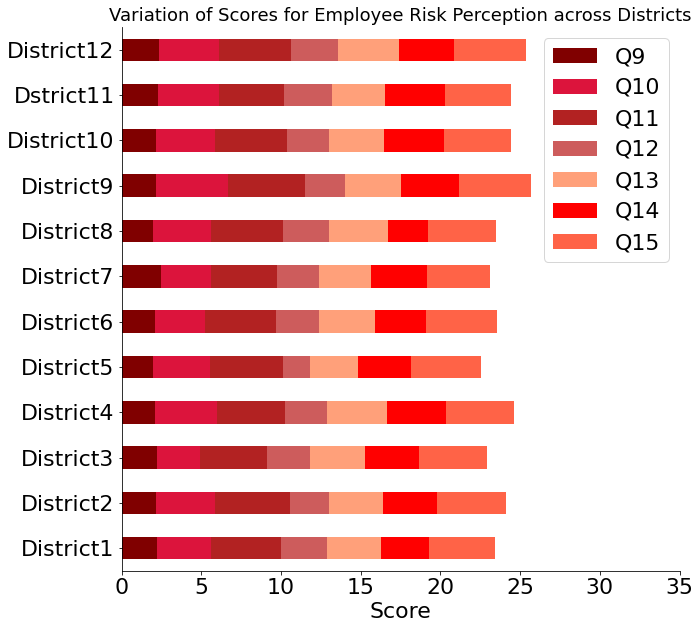

In [11]:
Questions=['Q9','Q10','Q11','Q12','Q13','Q14','Q15']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']
List=['In highway maintenance work,there is a high probability that workers \n are going to be involved in a work-related accident',
                         'At work, we take the risk of getting hurt in order to get the job done',
                         'In our work, productivity is more important and valued than safety',
                         'In our work, the probability of being involved in a traffic accident\n is higher than the probability of being involved in a work-related accident',
                         'In our work, we are more concerned about \n traffic-related accidents than work-related accidents',
                         'In highway maintenance work, the risk of getting hurt is part of the job',
                         'In our work, we take safety shortcuts when necessary']
ERP_District=pd.DataFrame([District_1_ERP,District_2_ERP,District_3_ERP,District_4_ERP,District_5_ERP,District_6_ERP,District_7_ERP,District_8_ERP,District_9_ERP,District_10_ERP,District_11_ERP,District_12_ERP])
ERP_District.transpose
#ERP_District=ERP_District.reset_index
ERP_District.columns=Questions
ERP_District.index=Districts_KYTC
District_ERP=ERP_District.reset_index()
#display(District_ERP)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#800000','#DC143C','#B22222','#CD5C5C','#FFA07A','#FF0000','#FF6347',]
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
ERP_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Employee Risk Perception across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,35])
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("ERP_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in ERP_District.iterrows():
    ERP_District.loc[index,'Total_Score_ERP']=(row["Q9"]+row["Q10"]+row["Q11"]+row["Q12"]+row["Q13"]+row["Q14"]+row["Q15"])/7
ERP_District['Total_Score_ERP']=ERP_District['Total_Score_ERP'].round(2)

ERP_District.to_excel('ERP_District.xlsx')
ERP_District

,Question,KYTC_Score,Rubric
0,Q9,2.20,Q9
3,Q12,2.66,Q12
5,Q14,3.36,Q14
1,Q10,3.47,Q10
4,Q13,3.48,Q13
6,Q15,4.27,Q15
2,Q11,4.41,Q11


3.4071428571428575

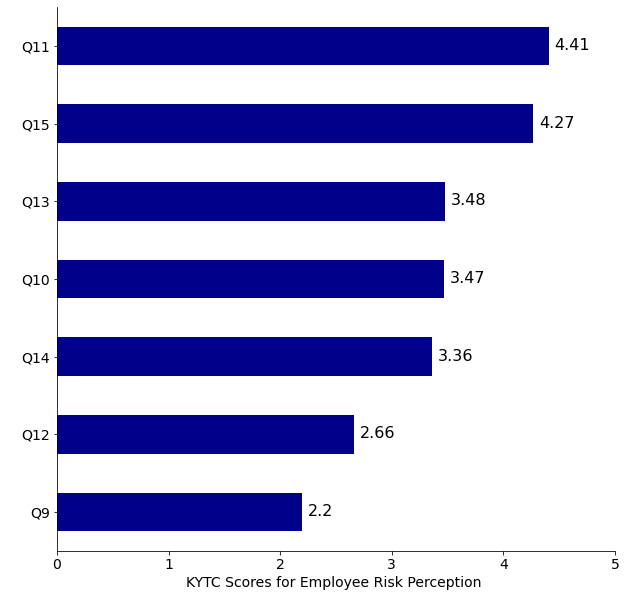

In [12]:
Score_KYTC_ERP=pd.DataFrame(list(zip(questions,answer)),columns=['Question','KYTC_Score'])
Score_KYTC_ERP
#Score_KYTC_ERP['Rubric']=['In highway maintenance work,there is a high probability that workers \n are going to be involved in a work-related accident',
#                          'At work, we take the risk of getting hurt in order to get the job done',
#                          'In our work, productivity is more important and valued than safety',
#                          'In our work, the probability of being involved in a traffic accident is higher\n than the probability of being involved in a work-related accident',
#                          'In our work, we are more concerned about \n traffic-related accidents than work-related accidents',
#                          'In highway maintenance work, the risk of getting hurt is part of the job',
#                          'In our work, we take safety shortcuts when necessary']
Score_KYTC_ERP['Rubric']=['Q9','Q10','Q11','Q12','Q13','Q14','Q15']                    
Score_KYTC_ERP['KYTC_Score']=pd.to_numeric(Score_KYTC_ERP['KYTC_Score']).round(2)
Score_KYTC_ERP=Score_KYTC_ERP.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_ERP)
ax=Score_KYTC_ERP.plot.barh(x='Rubric', y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Employee Risk Perception ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_ERP['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_ERP.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
ERP_KYTC_Scores=Score_KYTC_ERP['KYTC_Score'].sum()/len(Score_KYTC_ERP)
ERP_KYTC_Scores


In [13]:
ERP_Percenatge

NameError: name 'ERP_Percenatge' is not defined

In [ ]:
Questions=['Q9','Q10','Q11','Q12','Q13','Q14','Q15']
# List=['In highway maintenance work,there is a high probability that workers \n are going to be involved in a work-related accident',
#                          'At work, we take the risk of getting hurt in order to get the job done',
#                          'In our work, productivity is more important and valued than safety',
#                          'In our work, the probability of being involved in a traffic accident\n is higher than the probability of being involved in a work-related accident',
#                          'In our work, we are more concerned about \n traffic-related accidents than work-related accidents',
#                          'In highway maintenance work, the risk of getting hurt is part of the job',
#                          'In our work, we take safety shortcuts when necessary']

#print(ERP_StronglyDisagree)
#print(ERP_Disagree)
#print(ERP_Neutral)
#print(ERP_Agree)
#print(ERP_StronglyAgree)
ERP_Percenatge=pd.DataFrame([ERP_StronglyDisagree,ERP_Disagree,ERP_Neutral,ERP_Agree,ERP_StronglyAgree])
ERP_Percenatge=ERP_Percenatge.transpose().round(2)
ERP_Percenatge.columns=(['StronglyDisagree','Disagree','Neutral','Agree','Strongly Agree'])
ERP_Percenatge.index=Questions
#EPR_Percenatge.index=(['Q9','Q10','Q11','Q12','Q13','Q14','Q15'])
# plt.show()
#print(EPR_Percenatge)
colors = ['#800000','#DC143C','#FAC748','#8390FA','#1D2F6F']
plt.figure()
ax=ERP_Percenatge.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=22)
plt.xlabel(("Percenatge"),fontsize=14)
plt.title("KYTC's Percenatges for Employee Risk Perception",fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

list_values = (ERP_Percenatge['StronglyDisagree'].tolist()
               +ERP_Percenatge['Disagree'].tolist()
               +ERP_Percenatge['Neutral'].tolist()
               +ERP_Percenatge['Agree'].tolist()
               +ERP_Percenatge['Strongly Agree'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='white', fontsize=12,rotation=-45)
plt.savefig("KYTC_ERP_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Climate Leading Indicator: Demonstarting Management Commitment {Q18,Q19,Q20,Q21,Q22,Q23}

In [19]:
def Recode_DMC(x):
    if x == 'Rarely comes to the actual jobsite' or x=='Typically act as poor safety role models by breaking safety policies and procedures.' or x== 'Does not participate in safety audits.' or x=="Does not want to know about any safety incident, unless it's a fatality. There are no investigations into incidents or close calls." or x== 'Immediately blames and punishes the employee (e.g., fired)'or x== 'There is no formal safety management system; safety trends are not analyzed.':
        return 1
    elif x =='Only comes to the job site after an incident has occurred.' or x=='Are only concerned with adhering to OSHA regulations and organizational policies and procedures after an employee injury has occured.' or x== 'Only participates in safety audits in response to an employee injury or adverse safety event.'  or x== 'Resists taking steps to correct or prevent future incidents. Investigations into incidents or close calls result in disciplinary action toward employees.' or x== 'Typically blames employees for injuries, threatening them with suspension or even termination.'or x=='The safety management system is reviewed and safety trends are only analyzed in response to employee injury or an adverse event.' :
        return 2
    elif x == 'Only comes to the job site when required or makes infrequent visits' or x=='Strictly conform to required OSHA regulations and organizational safety policies and procedures, never more or less.'or x=='Participates in safety audits only when required.'or x=='Investigates incident but not in a "blame-free" manner. Initiates corrective actions.'or x=='Only holds employees accountable for injuries according to organizational guidelines.'or x=='The safety management system is reviewed and safety trends are analyzed from time to time.' :
        return 3
    elif x == 'Makes regular visits to the job site. Interacts mostly with management.'or x=='Demonstrate safety behaviors above and beyond what is required.' or x=='Initiates and actively participates in internal safety audits.'or x== 'Includes employees in both a root cause analysis and helping to come up with solutions to prevent future incidents and foster continued improvements.'or x== 'Provides appropriate support for the injured employees.' or x=='The safety management system is reviewed and safety trends are analyzed annually to ensure effectiveness and relevance.':
        return 4
    elif x == 'Frequently visits the job site; seeks out interactions with employees.'or x=='Consistently model safety behaviors above and beyond what is required and recognize employees who do the same'or x== 'Actively participates in internal safety audits and uses the information for management performance evaluation.' or x=='Relies on a formalized process for conducting a detailed root cause analysis that reviews both processes and behaviors. Findings are discussed with everyone and preventive solutions are implemented.' or x== 'Provides support to injured employees, facilitate return to work, and seeks to learn from employee injuries.'or x=='The safety management system is reviewed and safety trends are analyzed bi-annually to ensure effectiveness and relevance.' :
        return 5
    else:
        return 0

In [20]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def DMC (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_DMC=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_DMC)# to give a score for each sentence
    
    #3. Concat the data 
    Demonstarting_Management_Commitment=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Demonstarting_Management_Commitment.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display(Demonstarting_Management_Commitment)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank= Demonstarting_Management_Commitment['Score'].groupby(Demonstarting_Management_Commitment['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    #display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Demonstarting Management Commitment across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_DMC=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_DMC,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Demonstarting_Management_Commitment,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q18','Q19','Q20','Q21','Q22','Q23']
    multiple_dfs(dfs,sheets,'DMC.xlsx', 1)
    
    return Demonstarting_Management_Commitment,KYTC,Question_Score_DMC,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q18


,Score,TotalFreq
4,0,9
3,1,17
5,2,4
2,3,26
1,4,35
0,5,52


The score of this question is: 3.5174825174825175 .


,Score,%_Frequency Q18
4,0,6.294
3,1,11.888
5,2,2.797
2,3,18.182
1,4,24.476
0,5,36.364


Answer for question: Q19


,Score,TotalFreq
3,0,11
4,1,5
5,2,4
2,3,30
0,4,50
1,5,43


The score of this question is: 3.6223776223776225 .


,Score,%_Frequency Q19
3,0,7.692
4,1,3.497
5,2,2.797
2,3,20.979
0,4,34.965
1,5,30.070


Answer for question: Q20


,Score,TotalFreq
3,0,20
5,1,3
4,2,4
2,3,31
0,4,48
1,5,37


The score of this question is: 3.3636363636363638 .


,Score,%_Frequency Q20
3,0,13.986
5,1,2.098
4,2,2.797
2,3,21.678
0,4,33.566
1,5,25.874


Answer for question: Q21


,Score,TotalFreq
3,0,12
5,1,2
4,2,2
2,3,19
0,4,64
1,5,44


The score of this question is: 3.769230769230769 .


,Score,%_Frequency Q21
3,0,8.392
5,1,1.399
4,2,1.399
2,3,13.287
0,4,44.755
1,5,30.769


Answer for question: Q22


,Score,TotalFreq
3,0,7
4,1,1
2,3,10
1,4,38
0,5,87


The score of this question is: 4.321678321678322 .


,Score,%_Frequency Q22
3,0,4.895
4,1,0.699
2,3,6.993
1,4,26.573
0,5,60.839


Answer for question: Q23


,Score,TotalFreq
3,0,16
5,1,1
4,2,4
2,3,32
0,4,47
1,5,43


The score of this question is: 3.5524475524475525 .


,Score,%_Frequency Q23
3,0,11.189
5,1,0.699
4,2,2.797
2,3,22.378
0,4,32.867
1,5,30.070


,%_Frequency Q18,%_Frequency Q19,%_Frequency Q20,%_Frequency Q21,%_Frequency Q22,%_Frequency Q23
Score,,,,,,
0,6.294,7.692,13.986,8.392,4.895,11.189
1,11.888,3.497,2.098,1.399,0.699,0.699
2,2.797,2.797,2.797,1.399,NaN,2.797
3,18.182,20.979,21.678,13.287,6.993,22.378
4,24.476,34.965,33.566,44.755,26.573,32.867
5,36.364,30.070,25.874,30.769,60.839,30.070


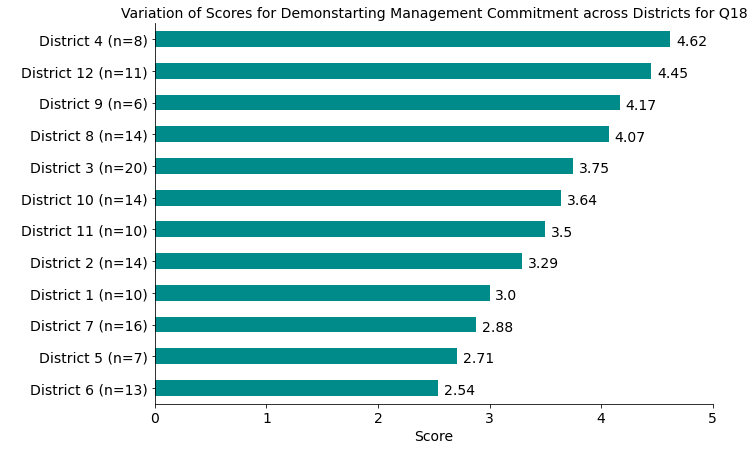

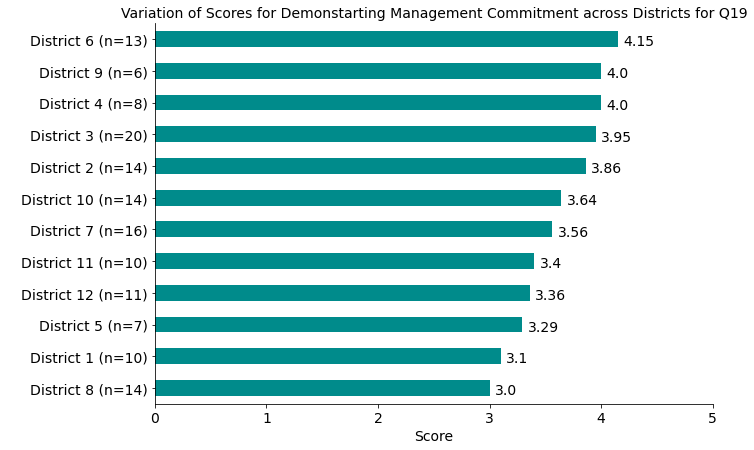

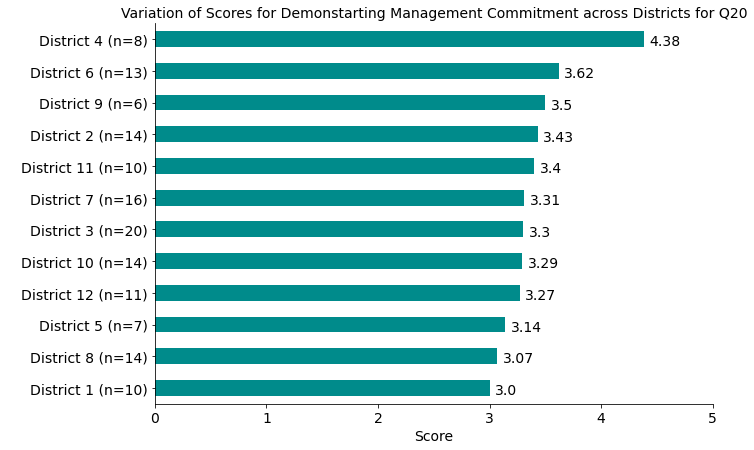

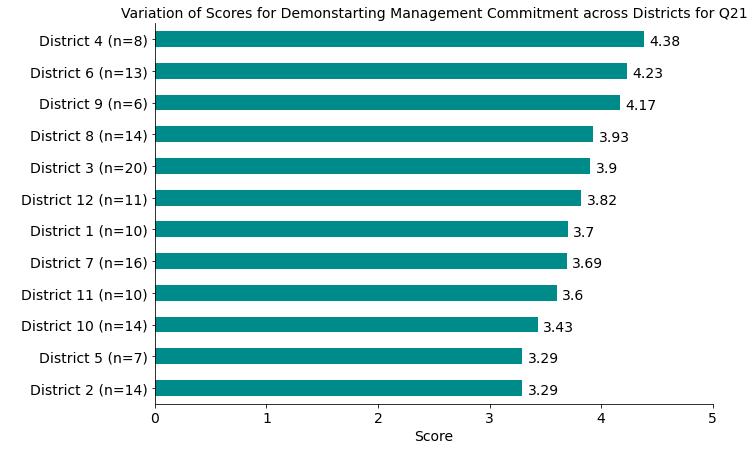

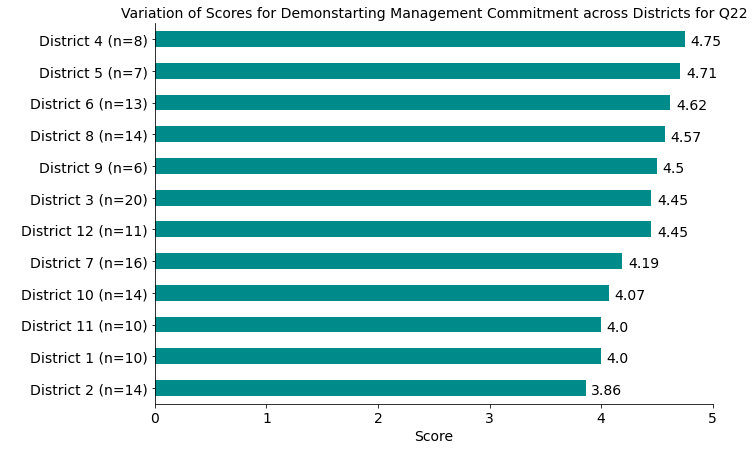

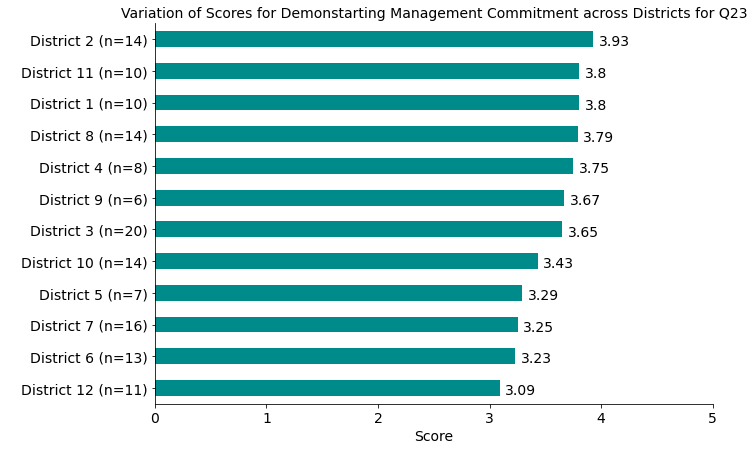

In [21]:
#For Loop to apply the LI function
questions = ['Q18','Q19','Q20','Q21','Q22','Q23'] 
DemonstartingManagementCommitment=pd.DataFrame()
DMC_Data=pd.DataFrame()
DMC_KYTC_DataFrame=pd.DataFrame()
DMC_answer=[]
District_1_DMC=[]
District_2_DMC=[]
District_3_DMC=[]
District_4_DMC=[]
District_5_DMC=[]
District_6_DMC=[]
District_7_DMC=[]
District_8_DMC=[]
District_9_DMC=[]
District_10_DMC=[]
District_11_DMC=[]
District_12_DMC=[]
for question in questions:
    print(f"Answer for question: {question}")
    Demonstarting_Management_Commitment,KYTC,Question_Score_DMC,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=DMC(df,question,'Q4')
    DMC_answer.append(Question_Score_DMC)
    District_1_DMC.append(D1)
    District_2_DMC.append(D2)
    District_3_DMC.append(D3)
    District_4_DMC.append(D4)
    District_5_DMC.append(D5)
    District_6_DMC.append(D6)
    District_7_DMC.append(D7)
    District_8_DMC.append(D8)
    District_9_DMC.append(D9)
    District_10_DMC.append(D10)
    District_11_DMC.append(D11)
    District_12_DMC.append(D12)
    DMC_KYTC_DataFrame=DMC_KYTC_DataFrame.append(KYTC_Per)
    #display(DMC_KYTC_DataFrame)
    DemonstartingManagementCommitment=DemonstartingManagementCommitment.append(KYTC)
    DMC_Data=DMC_Data.append(Demonstarting_Management_Commitment)
DMC_Percentage=DMC_KYTC_DataFrame[['%_Frequency Q18','%_Frequency Q19','%_Frequency Q20','%_Frequency Q21','%_Frequency Q22','%_Frequency Q23']].groupby(DMC_KYTC_DataFrame['Score']).first()
display(DMC_Percentage)
Questions=['Q18','Q19','Q20','Q21','Q22','Q23']
DMC_Percentage=DMC_Percentage.transpose().fillna(value=0).round(2)
DMC_Percentage
DMC_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
DMC_Percentage.index=Questions

In [ ]:
 DemonstartingManagementCommitment

In [ ]:
DMC_Mean= DemonstartingManagementCommitment.groupby(DemonstartingManagementCommitment["Score"]).mean()
DMC_Mean

In [ ]:
Questions=['Q18','Q19','Q20','Q21','Q22','Q23']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

DMC_District=pd.DataFrame([District_1_DMC,District_2_DMC,District_3_DMC,District_4_DMC,District_5_DMC,District_6_DMC,District_7_DMC,District_8_DMC,District_9_DMC,District_10_DMC,District_11_DMC,District_12_DMC])
DMC_District.transpose
#ERP_District=ERP_District.reset_index
DMC_District.columns=Questions
DMC_District.index=Districts_KYTC
District_DMC=DMC_District.reset_index()
display(District_DMC)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#7FFF00','#006400','#00FF00','#98FB98','#00FA9A','#2E8B57']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
DMC_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Demonstrating Management Commitment across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,30])
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("DMC_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in DMC_District.iterrows():
    DMC_District.loc[index,'Total_Score_DMC']=(row["Q18"]+row["Q19"]+row["Q20"]+row["Q21"]+row["Q22"]+row["Q23"])/6

DMC_District.to_excel('DMC_District.xlsx')
DMC_District

In [ ]:
Questions=['Q18','Q19','Q20','Q21','Q22','Q23']
Score_KYTC_DMC=pd.DataFrame(list(zip(questions,DMC_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_DMC
Score_KYTC_DMC['KYTC_Score']=pd.to_numeric(Score_KYTC_DMC['KYTC_Score']).round(2)
Score_KYTC_DMC=Score_KYTC_DMC.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_DMC)
ax=Score_KYTC_DMC.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Demonstarting Management Commitment ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_DMC['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_DMC.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
DMC_KYTC_Scores=Score_KYTC_DMC['KYTC_Score'].sum()/len(Score_KYTC_DMC)
DMC_KYTC_Scores


In [ ]:
DMC_Percentage

<Figure size 432x288 with 0 Axes>

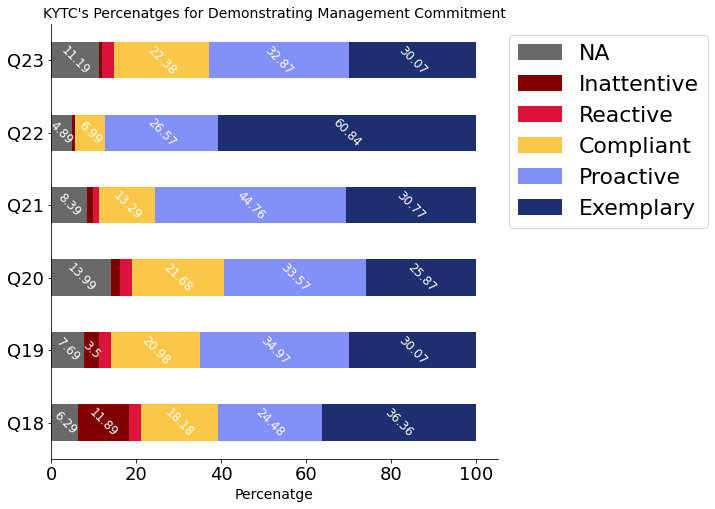

In [23]:
#KYTC Figure for Demonstrating Managemnt Commitment
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
DMC_Percentage
ax=DMC_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for Demonstrating Management Commitment",fontsize=14)
list_values = (DMC_Percentage['NA'].tolist()
               +DMC_Percentage['Inattentive'].tolist()
               +DMC_Percentage['Reactive'].tolist()
               +DMC_Percentage['Compliant'].tolist()
               +DMC_Percentage['Proactive'].tolist()
               +DMC_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_DMC_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Leading Indicator:Aligning and Integarting Safety as a Value {Q25,Q26,Q27,Q28,Q29,Q30}

In [25]:
def Recode_AIS(x): 
    if x=='Our work is inherently dangerous, and nothing can be done to change it.'or x=='Never.'or x=='The primary focus is on productivity and reducing costs. Employees are rewarded for taking shortcuts to meet production goals.'or x=='Safety is not integrated within organizational policies and procedures.'or x=='There is no focus on proactive or reactive safety measures.'or x== 'Does not invest in safety program development or provide adequate resources to conduct work safely.':
        return 1 
    elif x=='Safety is costly and a burden; a necessary evil.'or x=='Only when accidents occurred.'or x=='When work falls behind schedule, production becomes valued more than safety.' or x=='Safety is not valued or enforced when management, OSHA, or safety professionals are not present.'or x=='Safety measures are only examined in response to accidents.'or x=='Only invests in safety program development and provides minimal resources to safety activities after an accident has occurred.':
        return 2
    elif x== 'Safety is only important because it is an OSHA requirement.'or x=='Only when required.'or x=='As long as minimum safety requirements are being met, production and cost reduction are the main priorities in our work.'or x== 'Safety is only integrated to the point of meeting minimum OSHA requirements.'or x=='Safety measures focus solely on reactive measures (e.g. injury rate, EMR).'or x=='Participates in safety program development and allocates resources to the extent that it is required by regulatory authorities (e.g. OSHA).':
        return 3   
    elif x == 'Safety is very important to employees and management alike.'or x=='At the end of most of our meetings.'or x=='For the most part, safety is not compromised for the sake of productivity. Work is completed as safely as possible.'or x=='Safety language is formally integrated into most policies and procedures.'or x=='Occasional attempts are made to measure and use proactive measures to improve job site safety climate.'or x=='Provides adequate resources to ensure a safe working environment. Develops a safety program that is shared with all employees.':
        return 4
    elif x=='Safety is a value of utmost importance and placed before all else.'or x=='At the beginning of every meeting because it is a top priority.'or x=='Safety is never compromised for productivity, schedule, or cost. Safety truly comes first.'or x=='Safety is formally and informally integrates into all policies and procedures.'or x=='Proactive measures are regularly assessed and acted upon (i.e. changes made) to improve the job site safety climate.'or x=='Provides ongoing financial support for ongoing development of safety policies, programs, and processes. Invests in systems to continually improve the job site safety climate.':
        return 5  
    else:
       
        return 0 

In [26]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def AIS (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_AIS=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_AIS)# to give a score for each sentence
    
    #3. Concat the data 
    Aligning_Integrating_Safety=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Aligning_Integrating_Safety.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display( Aligning_Integrating_Safety)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank=  Aligning_Integrating_Safety['Score'].groupby( Aligning_Integrating_Safety['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Aligning and Integrating Safety as a Value across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove the boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #7. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #8 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_AIS=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_AIS,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #10. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Aligning_Integrating_Safety,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q25','Q26','Q27','Q28','Q29','Q30']
    multiple_dfs(dfs,sheets,'AIS.xlsx', 1)
    
    return Aligning_Integrating_Safety,KYTC,Question_Score_AIS,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q25


,District,Score,Freq
0,District 1,4,5
1,District 1,5,4
2,District 1,1,1
3,District 10,4,6
4,District 10,5,6
5,District 10,0,2
6,District 11,4,6
7,District 11,5,2
8,District 11,2,1
9,District 11,3,1


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,41,4.10,District 1 (n=10)
1,District 10,14,54,3.86,District 10 (n=14)
2,District 11,10,39,3.90,District 11 (n=10)
3,District 12,11,50,4.55,District 12 (n=11)
4,District 2,14,58,4.14,District 2 (n=14)
5,District 3,20,87,4.35,District 3 (n=20)
6,District 4,8,33,4.12,District 4 (n=8)
7,District 5,7,27,3.86,District 5 (n=7)
8,District 6,13,58,4.46,District 6 (n=13)
9,District 7,16,61,3.81,District 7 (n=16)


,Score,TotalFreq
4,0,4
2,1,5
3,2,4
5,3,2
1,4,62
0,5,66


The score of this question is: 4.174825174825175 .


,Score,%_Frequency Q25
4,0,2.797
2,1,3.497
3,2,2.797
5,3,1.399
1,4,43.357
0,5,46.154


,Score,%_Frequency Q25
4,0,2.797
2,1,3.497
3,2,2.797
5,3,1.399
1,4,43.357
0,5,46.154


Answer for question: Q26


,District,Score,Freq
0,District 1,5,8
1,District 1,4,2
2,District 10,5,7
3,District 10,4,5
4,District 10,0,2
5,District 11,3,2
6,District 11,2,1
7,District 11,4,4
8,District 11,5,3
9,District 12,5,6


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,48,4.80,District 1 (n=10)
1,District 10,14,55,3.93,District 10 (n=14)
2,District 11,10,39,3.90,District 11 (n=10)
3,District 12,11,45,4.09,District 12 (n=11)
4,District 2,14,67,4.79,District 2 (n=14)
5,District 3,20,94,4.70,District 3 (n=20)
6,District 4,8,39,4.88,District 4 (n=8)
7,District 5,7,31,4.43,District 5 (n=7)
8,District 6,13,63,4.85,District 6 (n=13)
9,District 7,16,61,3.81,District 7 (n=16)


,Score,TotalFreq
3,0,5
4,2,1
2,3,10
1,4,33
0,5,94


The score of this question is: 4.433566433566433 .


,Score,%_Frequency Q26
3,0,3.497
4,2,0.699
2,3,6.993
1,4,23.077
0,5,65.734


,Score,%_Frequency Q25,%_Frequency Q26
4,0,2.797,NaN
2,1,3.497,NaN
3,2,2.797,NaN
5,3,1.399,NaN
1,4,43.357,NaN
0,5,46.154,NaN
3,0,NaN,3.497
4,2,NaN,0.699
2,3,NaN,6.993
1,4,NaN,23.077


Answer for question: Q27


,District,Score,Freq
0,District 1,4,6
1,District 1,5,3
2,District 1,3,1
3,District 10,5,8
4,District 10,4,4
5,District 10,0,2
6,District 11,1,1
7,District 11,3,1
8,District 11,4,5
9,District 11,5,3


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,42,4.20,District 1 (n=10)
1,District 10,14,56,4.00,District 10 (n=14)
2,District 11,10,39,3.90,District 11 (n=10)
3,District 12,11,49,4.45,District 12 (n=11)
4,District 2,14,65,4.64,District 2 (n=14)
5,District 3,20,83,4.15,District 3 (n=20)
6,District 4,8,35,4.38,District 4 (n=8)
7,District 5,7,28,4.00,District 5 (n=7)
8,District 6,13,55,4.23,District 6 (n=13)
9,District 7,16,62,3.88,District 7 (n=16)


,Score,TotalFreq
3,0,6
5,1,1
4,2,1
2,3,9
1,4,59
0,5,67


The score of this question is: 4.2027972027972025 .


,Score,%_Frequency Q27
3,0,4.196
5,1,0.699
4,2,0.699
2,3,6.294
1,4,41.259
0,5,46.853


,Score,%_Frequency Q25,%_Frequency Q26,%_Frequency Q27
4,0,2.797,NaN,NaN
2,1,3.497,NaN,NaN
3,2,2.797,NaN,NaN
5,3,1.399,NaN,NaN
1,4,43.357,NaN,NaN
0,5,46.154,NaN,NaN
3,0,NaN,3.497,NaN
4,2,NaN,0.699,NaN
2,3,NaN,6.993,NaN
1,4,NaN,23.077,NaN


Answer for question: Q28


,District,Score,Freq
0,District 1,4,6
1,District 1,5,3
2,District 1,3,1
3,District 10,5,8
4,District 10,4,4
5,District 10,0,2
6,District 11,3,1
7,District 11,2,1
8,District 11,5,5
9,District 11,4,3


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,42,4.20,District 1 (n=10)
1,District 10,14,56,4.00,District 10 (n=14)
2,District 11,10,42,4.20,District 11 (n=10)
3,District 12,11,46,4.18,District 12 (n=11)
4,District 2,14,63,4.50,District 2 (n=14)
5,District 3,20,84,4.20,District 3 (n=20)
6,District 4,8,27,3.38,District 4 (n=8)
7,District 5,7,28,4.00,District 5 (n=7)
8,District 6,13,59,4.54,District 6 (n=13)
9,District 7,16,61,3.81,District 7 (n=16)


,Score,TotalFreq
2,0,8
5,1,2
4,2,3
3,3,5
1,4,49
0,5,76


The score of this question is: 4.188811188811189 .


,Score,%_Frequency Q28
2,0,5.594
5,1,1.399
4,2,2.098
3,3,3.497
1,4,34.266
0,5,53.147


,Score,%_Frequency Q25,%_Frequency Q26,%_Frequency Q27,%_Frequency Q28
4,0,2.797,NaN,NaN,NaN
2,1,3.497,NaN,NaN,NaN
3,2,2.797,NaN,NaN,NaN
5,3,1.399,NaN,NaN,NaN
1,4,43.357,NaN,NaN,NaN
0,5,46.154,NaN,NaN,NaN
3,0,NaN,3.497,NaN,NaN
4,2,NaN,0.699,NaN,NaN
2,3,NaN,6.993,NaN,NaN
1,4,NaN,23.077,NaN,NaN


Answer for question: Q29


,District,Score,Freq
0,District 1,4,4
1,District 1,5,4
2,District 1,0,1
3,District 1,2,1
4,District 10,5,8
5,District 10,4,3
6,District 10,0,2
7,District 10,3,1
8,District 11,3,1
9,District 11,2,1


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,38,3.80,District 1 (n=10)
1,District 10,14,55,3.93,District 10 (n=14)
2,District 11,10,40,4.00,District 11 (n=10)
3,District 12,11,45,4.09,District 12 (n=11)
4,District 2,14,57,4.07,District 2 (n=14)
5,District 3,20,88,4.40,District 3 (n=20)
6,District 4,8,34,4.25,District 4 (n=8)
7,District 5,7,30,4.29,District 5 (n=7)
8,District 6,13,58,4.46,District 6 (n=13)
9,District 7,16,63,3.94,District 7 (n=16)


,Score,TotalFreq
3,0,8
4,2,4
2,3,9
1,4,47
0,5,75


The score of this question is: 4.181818181818182 .


,Score,%_Frequency Q29
3,0,5.594
4,2,2.797
2,3,6.294
1,4,32.867
0,5,52.448


,Score,%_Frequency Q25,%_Frequency Q26,%_Frequency Q27,%_Frequency Q28,%_Frequency Q29
4,0,2.797,NaN,NaN,NaN,NaN
2,1,3.497,NaN,NaN,NaN,NaN
3,2,2.797,NaN,NaN,NaN,NaN
5,3,1.399,NaN,NaN,NaN,NaN
1,4,43.357,NaN,NaN,NaN,NaN
0,5,46.154,NaN,NaN,NaN,NaN
3,0,NaN,3.497,NaN,NaN,NaN
4,2,NaN,0.699,NaN,NaN,NaN
2,3,NaN,6.993,NaN,NaN,NaN
1,4,NaN,23.077,NaN,NaN,NaN


Answer for question: Q30


,District,Score,Freq
0,District 1,4,6
1,District 1,5,3
2,District 1,2,1
3,District 10,5,6
4,District 10,4,5
5,District 10,0,2
6,District 10,3,1
7,District 11,1,1
8,District 11,5,2
9,District 11,4,5


,District,Total_Freq,Value,Score,Y-axis
0,District 1,10,41,4.10,District 1 (n=10)
1,District 10,14,53,3.79,District 10 (n=14)
2,District 11,10,37,3.70,District 11 (n=10)
3,District 12,11,44,4.00,District 12 (n=11)
4,District 2,14,57,4.07,District 2 (n=14)
5,District 3,20,87,4.35,District 3 (n=20)
6,District 4,8,31,3.88,District 4 (n=8)
7,District 5,7,29,4.14,District 5 (n=7)
8,District 6,13,55,4.23,District 6 (n=13)
9,District 7,16,62,3.88,District 7 (n=16)


,Score,TotalFreq
3,0,4
4,1,3
5,2,2
2,3,10
0,4,75
1,5,49


The score of this question is: 4.06993006993007 .


,Score,%_Frequency Q30
3,0,2.797
4,1,2.098
5,2,1.399
2,3,6.993
0,4,52.448
1,5,34.266


,Score,%_Frequency Q25,%_Frequency Q26,%_Frequency Q27,%_Frequency Q28,%_Frequency Q29,%_Frequency Q30
4,0,2.797,NaN,NaN,NaN,NaN,NaN
2,1,3.497,NaN,NaN,NaN,NaN,NaN
3,2,2.797,NaN,NaN,NaN,NaN,NaN
5,3,1.399,NaN,NaN,NaN,NaN,NaN
1,4,43.357,NaN,NaN,NaN,NaN,NaN
0,5,46.154,NaN,NaN,NaN,NaN,NaN
3,0,NaN,3.497,NaN,NaN,NaN,NaN
4,2,NaN,0.699,NaN,NaN,NaN,NaN
2,3,NaN,6.993,NaN,NaN,NaN,NaN
1,4,NaN,23.077,NaN,NaN,NaN,NaN


,%_Frequency Q25,%_Frequency Q26,%_Frequency Q27,%_Frequency Q28,%_Frequency Q29,%_Frequency Q30
Score,,,,,,
0,2.797,3.497,4.196,5.594,5.594,2.797
1,3.497,NaN,0.699,1.399,NaN,2.098
2,2.797,0.699,0.699,2.098,2.797,1.399
3,1.399,6.993,6.294,3.497,6.294,6.993
4,43.357,23.077,41.259,34.266,32.867,52.448
5,46.154,65.734,46.853,53.147,52.448,34.266


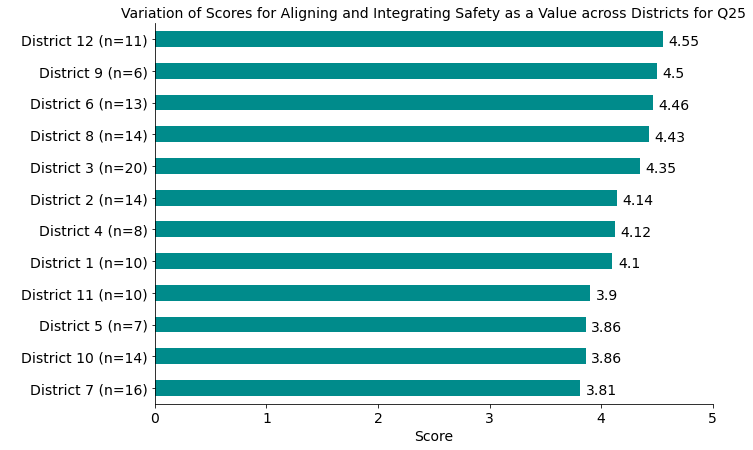

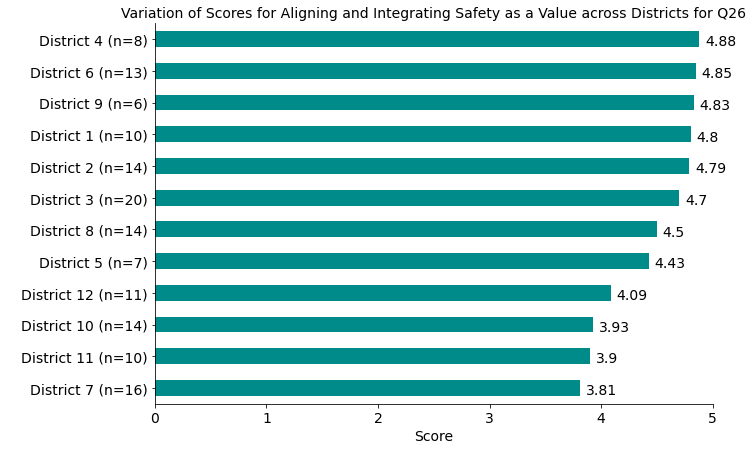

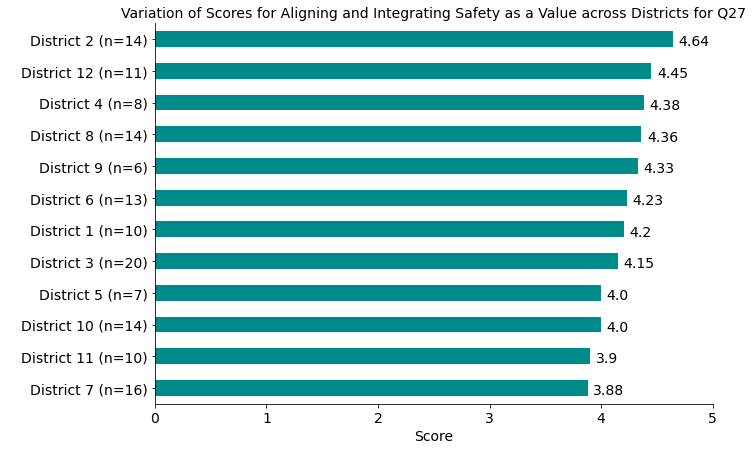

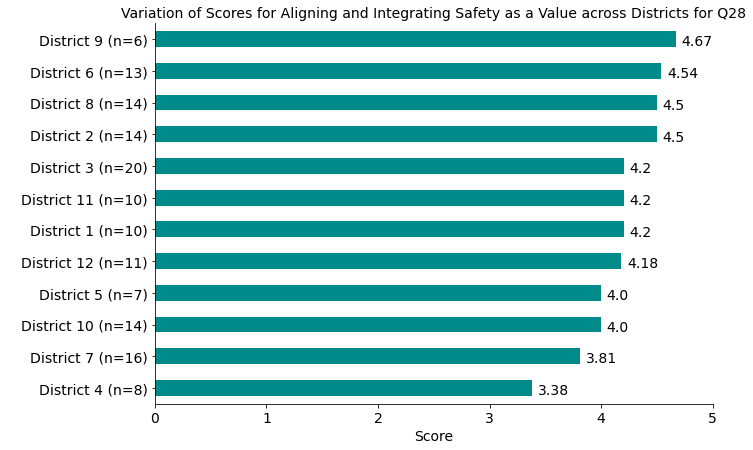

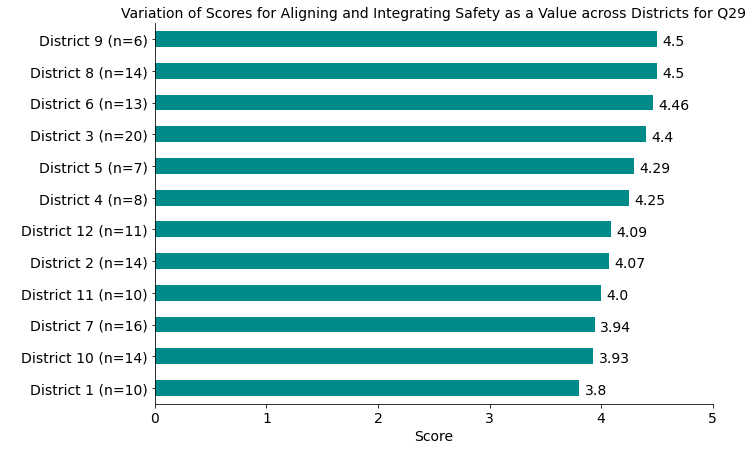

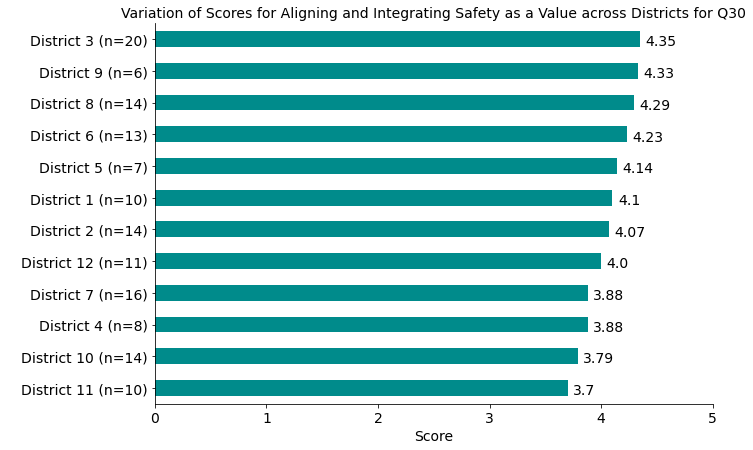

In [27]:
#For Loop to apply the LI function
questions = ['Q25','Q26','Q27','Q28','Q29','Q30'] 
AIS_Data=pd.DataFrame()
AligningIntegratingSafety=pd.DataFrame()
AIS_KYTC_DataFrame=pd.DataFrame()
AIS_answer=[]
District_1_AIS=[]
District_2_AIS=[]
District_3_AIS=[]
District_4_AIS=[]
District_5_AIS=[]
District_6_AIS=[]
District_7_AIS=[]
District_8_AIS=[]
District_9_AIS=[]
District_10_AIS=[]
District_11_AIS=[]
District_12_AIS=[]
for question in questions:
    print(f"Answer for question: {question}")
    Aligning_Integrating_Safety,KYTC,Question_Score_AIS,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=AIS(df,question,'Q4')
    AIS_answer.append(Question_Score_AIS)
    District_1_AIS.append(D1)
    District_2_AIS.append(D2)
    District_3_AIS.append(D3)
    District_4_AIS.append(D4)
    District_5_AIS.append(D5)
    District_6_AIS.append(D6)
    District_7_AIS.append(D7)
    District_8_AIS.append(D8)
    District_9_AIS.append(D9)
    District_10_AIS.append(D10)
    District_11_AIS.append(D11)
    District_12_AIS.append(D12)
    AIS_KYTC_DataFrame=AIS_KYTC_DataFrame.append(KYTC_Per)
    display(AIS_KYTC_DataFrame)
    AligningIntegratingSafety=AligningIntegratingSafety.append(KYTC)
    AIS_Data=AIS_Data.append(Aligning_Integrating_Safety)
AIS_Percentage=AIS_KYTC_DataFrame[['%_Frequency Q25','%_Frequency Q26','%_Frequency Q27','%_Frequency Q28','%_Frequency Q29','%_Frequency Q30']].groupby(AIS_KYTC_DataFrame['Score']).first()
display(AIS_Percentage)
Questions=['Q25','Q26','Q27','Q28','Q29','Q30']
AIS_Percentage=AIS_Percentage.transpose().fillna(value=0).round(2)
AIS_Percentage
AIS_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
AIS_Percentage.index=Questions

In [ ]:
AligningIntegratingSafety

In [ ]:
AIS_Mean=AligningIntegratingSafety.groupby(AligningIntegratingSafety["Score"]).mean()
AIS_Mean

In [ ]:
Questions=['Q25','Q26','Q27','Q28','Q29','Q30']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

AIS_District=pd.DataFrame([District_1_AIS,District_2_AIS,District_3_AIS,District_4_AIS,District_5_AIS,District_6_AIS,District_7_AIS,District_8_AIS,District_9_AIS,District_10_AIS,District_11_AIS,District_12_AIS])
AIS_District.transpose
AIS_District.columns=Questions
AIS_District.index=Districts_KYTC
District_AIS=AIS_District.reset_index()
display(District_AIS)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#2F4F4F','#008B8B','#00FFFF','#40E0D0','#00CED1','#7FFFD4']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
AIS_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Aligning and Integarting Safety as a Value across Districts',fontsize=16)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,30])
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AIS_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in AIS_District.iterrows():
    AIS_District.loc[index,'Total_Score_AIS']=(row["Q25"]+row["Q26"]+row["Q27"]+row["Q28"]+row["Q29"]+row["Q30"])/6

AIS_District.to_excel('AIS_District.xlsx')
AIS_District

In [ ]:
Questions=['Q25','Q26','Q27','Q28','Q29','Q30']
Score_KYTC_AIS=pd.DataFrame(list(zip(questions,AIS_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_AIS
Score_KYTC_AIS['KYTC_Score']=pd.to_numeric(Score_KYTC_AIS['KYTC_Score']).round(2)
Score_KYTC_AIS=Score_KYTC_AIS.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_AIS)
ax=Score_KYTC_AIS.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Aligning and Integarting Safety as a Value ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_AIS['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_AIS.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
AIS_KYTC_Scores=Score_KYTC_AIS['KYTC_Score'].sum()/len(Score_KYTC_AIS)
AIS_KYTC_Scores
plt.show()


<Figure size 432x288 with 0 Axes>

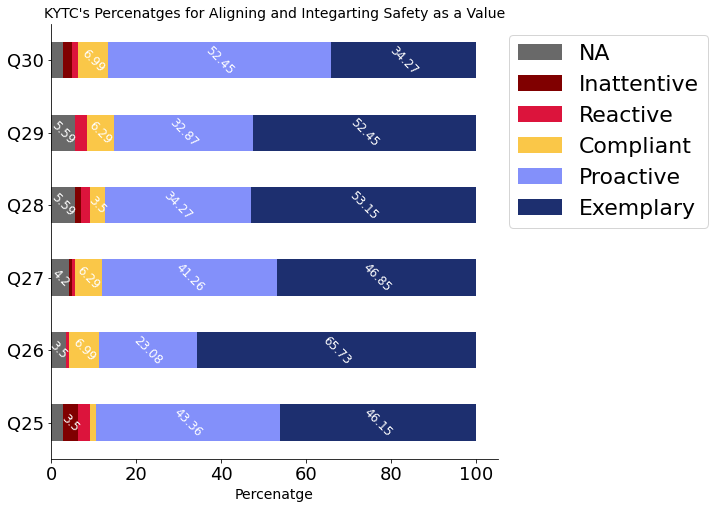

In [28]:
#KYTC Figure for Aligning and Integarting Safety as a Value
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=AIS_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for Aligning and Integarting Safety as a Value",fontsize=14)
list_values = (AIS_Percentage['NA'].tolist()
               +AIS_Percentage['Inattentive'].tolist()
               +AIS_Percentage['Reactive'].tolist()
               +AIS_Percentage['Compliant'].tolist()
               +AIS_Percentage['Proactive'].tolist()
               +AIS_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)
plt.savefig("KYTC_AIS_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Climate Leading Indicator: Accountability at All Levels {Q32,Q33,Q34,Q35}

In [29]:
def Recode_AAL(x): 
    if x =='Employee safety performance is not evaluated at all. If they mess up, they are fired.'or x=="There are no safety-related metrics included in managers' or supervisors' performance evaluations." or x=='Are not identified nor articulated to individuals working at the job site.' or x=='There is no safety incentive structure.':
        return 1
    elif x=='Employees are punished for not practicing safe behaviors, but they are not rewarded for proactively identifying hazards.'or x=="The only safety metric used in managers' and supervisors' evaluations is the number of employee injuries, and often that is ignored."or x=='Are only clarified after an accident.'or x=='Employees are informed that an event may impact whether or not they will receive a safety reward.':
        return 2
    elif x =='Safety metrics for employee performance evaluation are given lip service and sometimes informally used to evaluate employee performance.'or  x=='Managers and supervisors are held accountable for meeting the minimum required safety standards but poor safety performance carries few real consequences.'or  x=='Are only set to meet OSHA requirements.'or  x=='Employees are told to work safely, and safety rewards are based on not getting hurt.':
        return 3   
    elif x =='Safety metrics are formally integrated into employee performance appraisal processes to evaluate and reward employees for maintaining and improving a positive job site safety climate.'or x=='Managers and supervisors are primarily held accountable for reactive safety measures (e.g. recordable injury rate), but some proactive measures (e.g. safety climate metrics) have been included.'or x=='Are frequently, clearly, and consistently communicated to employees.'or x=='Employees are recognized and rewarded for identifying hazards, reporting near misses and close calls, creating safety solutions, and for superior safety performance.':
        return 4
    elif x=='Safety metrics are formally integrated into employee performance appraisal processes to evaluate and reward employees for maintaining and improving a positive job site safety climate. Data are used to identify targeted training opportunities.'or x=='Managers and supervisors are held accountable for proactive (e.g. safety climate metrics) and reactive safety measures. Proactive safety leadership is a critical component of their evaluation and promotion.'or x=='Are discussed with employees across the entire Cabinet; they are reinforced on a daily basis.' or x=='Safety metrics (based on proactive and reactive measures) are benchmarked against other organizations and used for internal continuous improvement. Everyone is recognized and rewarded for safety performance.':
        return 5  
    else:
       
        return 0

In [30]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def AAL (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_AAL=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_AAL)# to give a score for each sentence
    
    #3. Concat the data 
    Accountability_ALL_Levels=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Accountability_ALL_Levels.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display(Accountability_ALL_Levels)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank= Accountability_ALL_Levels['Score'].groupby(Accountability_ALL_Levels['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Accountability at All Levels across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_AAL=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_AAL,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Accountability_ALL_Levels,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q32','Q33','Q34','Q35']
    multiple_dfs(dfs,sheets,'AAL.xlsx', 1)
    
    return Accountability_ALL_Levels,KYTC,Question_Score_AAL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q32


,District,Score,Freq
0,District 1,4,5
1,District 1,0,2
2,District 1,3,2
3,District 1,5,1
4,District 10,5,5
5,District 10,4,4
6,District 10,0,2
7,District 10,2,2
8,District 10,3,1
9,District 11,3,1


,Score,TotalFreq
3,0,12
4,2,9
2,3,19
0,4,63
1,5,40


The score of this question is: 3.6853146853146854 .


,Score,%_Frequency Q32
3,0,8.392
4,2,6.294
2,3,13.287
0,4,44.056
1,5,27.972


Answer for question: Q33


,District,Score,Freq
0,District 1,3,4
1,District 1,0,2
2,District 1,4,2
3,District 1,5,2
4,District 10,4,5
5,District 10,5,4
6,District 10,0,3
7,District 10,3,2
8,District 11,5,2
9,District 11,2,1


,Score,TotalFreq
3,0,15
4,1,7
5,2,1
2,3,22
1,4,46
0,5,52


The score of this question is: 3.629370629370629 .


,Score,%_Frequency Q33
3,0,10.490
4,1,4.895
5,2,0.699
2,3,15.385
1,4,32.168
0,5,36.364


Answer for question: Q34


,District,Score,Freq
0,District 1,4,6
1,District 1,5,2
2,District 1,0,1
3,District 1,2,1
4,District 10,4,8
5,District 10,5,4
6,District 10,0,2
7,District 11,5,3
8,District 11,2,1
9,District 11,4,6


,Score,TotalFreq
3,0,8
5,1,1
4,2,2
2,3,8
0,4,85
1,5,39


The score of this question is: 3.944055944055944 .


,Score,%_Frequency Q34
3,0,5.594
5,1,0.699
4,2,1.399
2,3,5.594
0,4,59.441
1,5,27.273


Answer for question: Q35


,District,Score,Freq
0,District 1,1,3
1,District 1,4,3
2,District 1,0,2
3,District 1,5,2
4,District 10,1,4
5,District 10,5,4
6,District 10,0,3
7,District 10,4,2
8,District 10,3,1
9,District 11,5,2


,Score,TotalFreq
3,0,24
0,1,40
4,3,13
1,4,35
2,5,31


The score of this question is: 2.6153846153846154 .


,Score,%_Frequency Q35
3,0,16.783
0,1,27.972
4,3,9.091
1,4,24.476
2,5,21.678


,%_Frequency Q32,%_Frequency Q33,%_Frequency Q34,%_Frequency Q35
Score,,,,
0,8.392,10.490,5.594,16.783
1,NaN,4.895,0.699,27.972
2,6.294,0.699,1.399,NaN
3,13.287,15.385,5.594,9.091
4,44.056,32.168,59.441,24.476
5,27.972,36.364,27.273,21.678


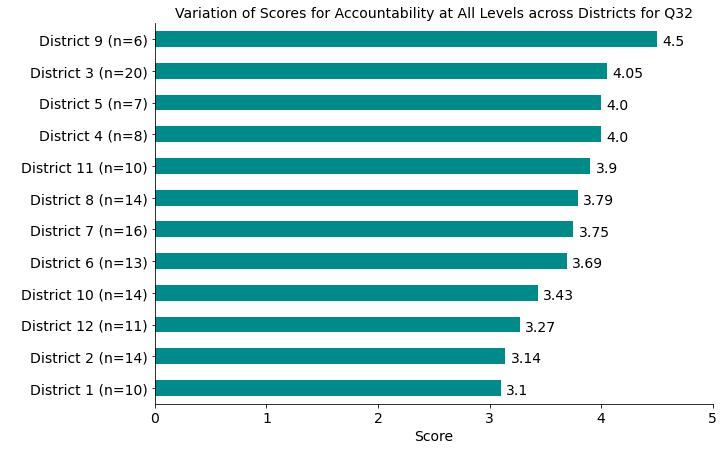

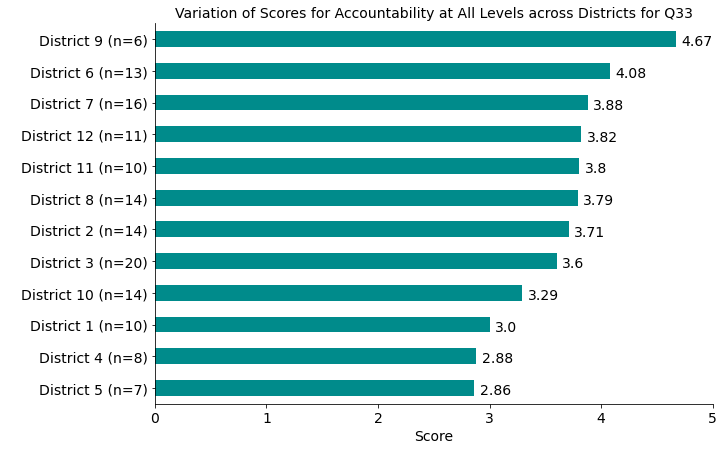

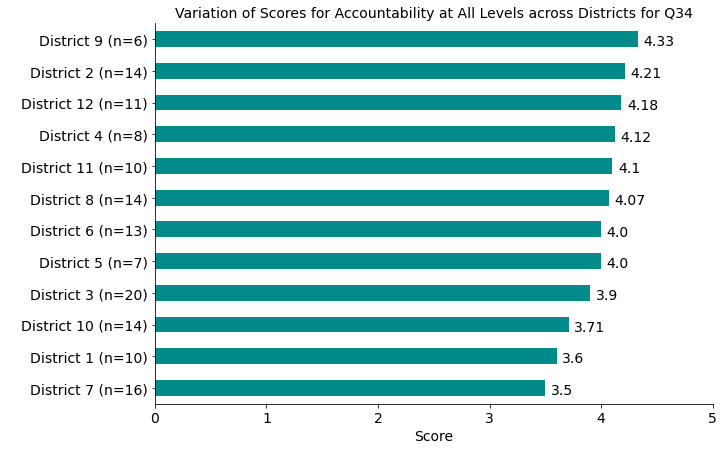

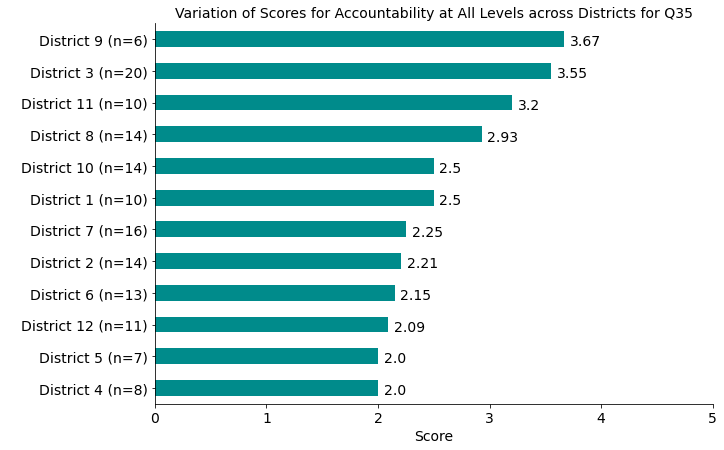

In [31]:
#For Loop to apply the LI function
questions = ['Q32','Q33','Q34','Q35'] 
AAL_Data=pd.DataFrame()
AccountabilityAllLevels=pd.DataFrame()
AAL_KYTC_DataFrame=pd.DataFrame()
AAL_answer=[]
District_1_AAL=[]
District_2_AAL=[]
District_3_AAL=[]
District_4_AAL=[]
District_5_AAL=[]
District_6_AAL=[]
District_7_AAL=[]
District_8_AAL=[]
District_9_AAL=[]
District_10_AAL=[]
District_11_AAL=[]
District_12_AAL=[]
for question in questions:
    print(f"Answer for question: {question}")
    Accountability_ALL_Levels,KYTC,Question_Score_AAL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=AAL(df,question,'Q4')
    AAL_answer.append(Question_Score_AAL)
    District_1_AAL.append(D1)
    District_2_AAL.append(D2)
    District_3_AAL.append(D3)
    District_4_AAL.append(D4)
    District_5_AAL.append(D5)
    District_6_AAL.append(D6)
    District_7_AAL.append(D7)
    District_8_AAL.append(D8)
    District_9_AAL.append(D9)
    District_10_AAL.append(D10)
    District_11_AAL.append(D11)
    District_12_AAL.append(D12)
    AAL_KYTC_DataFrame=AAL_KYTC_DataFrame.append(KYTC_Per)
    AccountabilityAllLevels=AccountabilityAllLevels.append(KYTC)
    AAL_Data=AAL_Data.append(Accountability_ALL_Levels)
    #display(AAL_KYTC_DataFrame)    
AAL_Percentage=AAL_KYTC_DataFrame[['%_Frequency Q32','%_Frequency Q33','%_Frequency Q34','%_Frequency Q35']].groupby(AAL_KYTC_DataFrame['Score']).first()
display(AAL_Percentage)
Questions=['Q32','Q33','Q34','Q35']
AAL_Percentage=AAL_Percentage.transpose().fillna(value=0).round(2)
AAL_Percentage
AAL_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
AAL_Percentage.index=Questions

In [ ]:
AccountabilityAllLevels

In [ ]:
AAL_Mean=AccountabilityAllLevels.groupby(AccountabilityAllLevels["Score"]).mean()
AAL_Mean

In [ ]:
Questions=['Q32','Q33','Q34','Q35']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

AAL_District=pd.DataFrame([District_1_AAL,District_2_AAL,District_3_AAL,District_4_AAL,District_5_AAL,District_6_AAL,District_7_AAL,District_8_AAL,District_9_AAL,District_10_AAL,District_11_AAL,District_12_AAL])
AAL_District.transpose

AAL_District.columns=Questions
AAL_District.index=Districts_KYTC
District_AAL=AAL_District.reset_index()
display(District_AAL)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#4682B4','#6495ED','#00BFFF','#1E90FF','#87CEFA']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
AAL_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Accountability at All Levels across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,20])
plt.xticks(np.arange(0,25,5))
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AAL_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in AAL_District.iterrows():
    AAL_District.loc[index,'Total_Score_AAL']=(row["Q32"]+row["Q33"]+row["Q34"]+row["Q35"])/4

AAL_District.to_excel('AAL_District.xlsx')
AAL_District

In [ ]:
Questions=['Q32','Q33','Q34','Q35']
Score_KYTC_AAL=pd.DataFrame(list(zip(questions,AAL_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_AAL
Score_KYTC_AAL['KYTC_Score']=pd.to_numeric(Score_KYTC_AAL['KYTC_Score']).round(2)
Score_KYTC_AAL=Score_KYTC_AAL.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_AAL)
ax=Score_KYTC_AAL.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Accountability at All Levels",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_AAL['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_AAL.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
AAL_KYTC_Scores=Score_KYTC_AAL['KYTC_Score'].sum()/len(Score_KYTC_AAL)
AAL_KYTC_Scores

<Figure size 432x288 with 0 Axes>

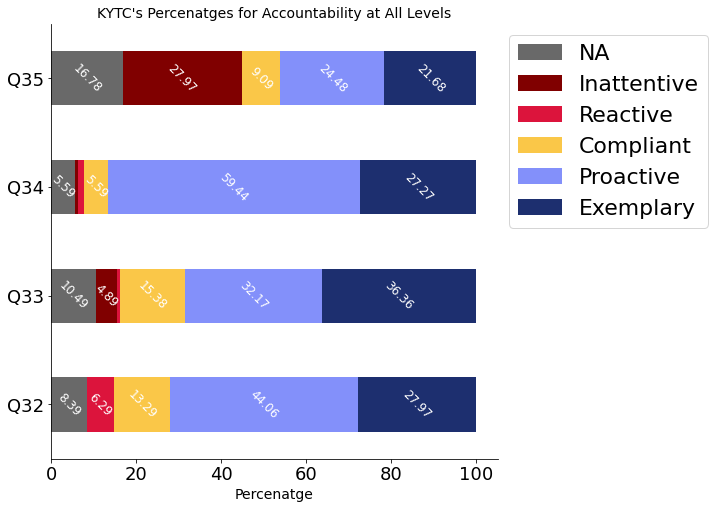

In [32]:
#KYTC Figure for Accountability at All Levels
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=AAL_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for Accountability at All Levels",fontsize=14)
list_values = (AAL_Percentage['NA'].tolist()
               +AAL_Percentage['Inattentive'].tolist()
               +AAL_Percentage['Reactive'].tolist()
               +AAL_Percentage['Compliant'].tolist()
               +AAL_Percentage['Proactive'].tolist()
               +AAL_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_AAL_Stacked.svg",bbox_inches = 'tight')
plt.show()

In [ ]:
AAL_Percentage

## Safety Climate Leading Indicator: Improving Supervisory Leadership {Q37,38,39} 

In [33]:
def Recode_ISL(x): 
    if x =="Supervisors don't have a safety-related vision to share with their crew. Their commitment is primarily to production."or x== 'Supervisors have no supervisory training and have little understanding or knowledge of regulatory requirements.'or x=='Manage and punish using intimidation, and focus only on individual behavior without taking what may have been a faulty process into account.':
        return 1
    elif x =="Supervisors don't have a safety-related vision. When an accident occurs, they tell employees they must work safely."or x=='After an incident occurs or some regulatory action is taken, there is talk among higher level management about the importance of supervisory leadership.'or x== 'Start caring for their crew and acting as safety leaders only after an incident occurs or regulatory action is taken. The behavior displayed is short-lived.':
        return 2
    elif x =='Supervisory safety vision consists only of meeting regulatory requirements and avoiding accidents.'or x=='Supervisors take OSHA 30-hour training and thus are familiar with OSHA regulations, but they have little or no leadership training.'or x=='"Talk the safety talk" but often do not follow their own advice and expectations.':
        return 3   
    elif x =='Supervisors talk with their crew about their vision for creating a strong, positive work safety climate. They display that commitment by "walking the talk."'or x=='Supervisors are trained not only on regulatory guidelines but have a minimal level of leadership training.'or x=='Initiate and actively participate in safety program activities that are focused on continuous improvement.':
        return 4
    elif x =='Supervisors share with their crew their vision for, and display a deep commitment to, creating a strong, positive work safety climate. They inspire and motivate employees to share that same commitment.'or x=='Supervisors are provided with and required to take leadership training that includes topics such as: how to communicate with and motivate team members; how to conduct pre-planning meetings; and how to inspire crew members to also be safety leaders.'or x=='Instill a sense of safety ownership at all levels. Serve as effective safety communicators, excellent role models for safety and are able to coach and teach. Infuse safety into every meeting.':
        return 5  
    else:
       
        return 0

In [34]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def ISL (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_ISL=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_ISL)# to give a score for each sentence
    
    #3. Concat the data 
    Improving_Supervisory_Leadership=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Improving_Supervisory_Leadership.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display(Improving_Supervisory_Leadership)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank=Improving_Supervisory_Leadership['Score'].groupby(Improving_Supervisory_Leadership['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Improving Supervisory Leadership across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_ISL=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_ISL,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Improving_Supervisory_Leadership,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q37','Q38','Q39']
    multiple_dfs(dfs,sheets,'ISL.xlsx', 1)
    
    return Improving_Supervisory_Leadership,KYTC,Question_Score_ISL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q37


,District,Score,Freq
0,District 1,4,5
1,District 1,5,3
2,District 1,3,2
3,District 10,4,5
4,District 10,5,5
5,District 10,0,2
6,District 10,3,2
7,District 11,3,1
8,District 11,1,2
9,District 11,5,4


,Score,TotalFreq
3,0,8
4,1,3
5,2,1
2,3,24
0,4,56
1,5,51


The score of this question is: 3.888111888111888 .


,Score,%_Frequency Q37
3,0,5.594
4,1,2.098
5,2,0.699
2,3,16.783
0,4,39.161
1,5,35.664


Answer for question: Q38


,District,Score,Freq
0,District 1,5,5
1,District 1,4,3
2,District 1,0,1
3,District 1,2,1
4,District 10,5,9
5,District 10,4,3
6,District 10,0,2
7,District 11,1,1
8,District 11,4,2
9,District 11,2,2


,Score,TotalFreq
2,0,9
4,1,3
3,2,8
5,3,1
1,4,31
0,5,91


The score of this question is: 4.2027972027972025 .


,Score,%_Frequency Q38
2,0,6.294
4,1,2.098
3,2,5.594
5,3,0.699
1,4,21.678
0,5,63.636


Answer for question: Q39


,District,Score,Freq
0,District 1,4,4
1,District 1,5,3
2,District 1,3,2
3,District 1,0,1
4,District 10,4,8
5,District 10,5,4
6,District 10,0,2
7,District 11,2,1
8,District 11,3,2
9,District 11,5,3


,Score,TotalFreq
2,0,10
4,2,3
3,3,8
0,4,72
1,5,50


The score of this question is: 3.972027972027972 .


,Score,%_Frequency Q39
2,0,6.993
4,2,2.098
3,3,5.594
0,4,50.350
1,5,34.965


,%_Frequency Q37,%_Frequency Q38,%_Frequency Q39
Score,,,
0,5.594,6.294,6.993
1,2.098,2.098,NaN
2,0.699,5.594,2.098
3,16.783,0.699,5.594
4,39.161,21.678,50.350
5,35.664,63.636,34.965


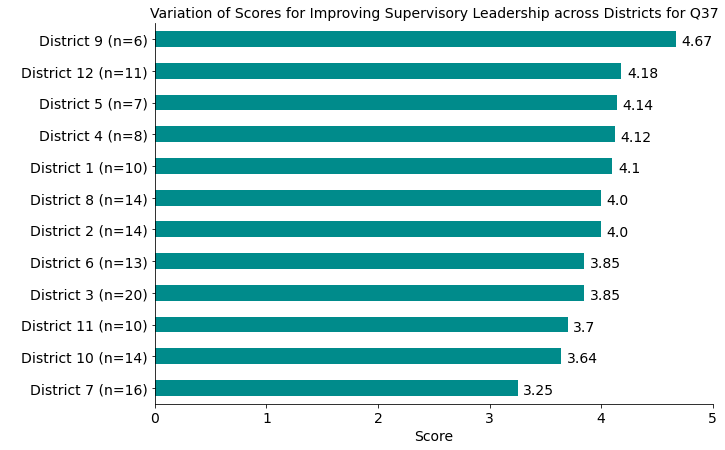

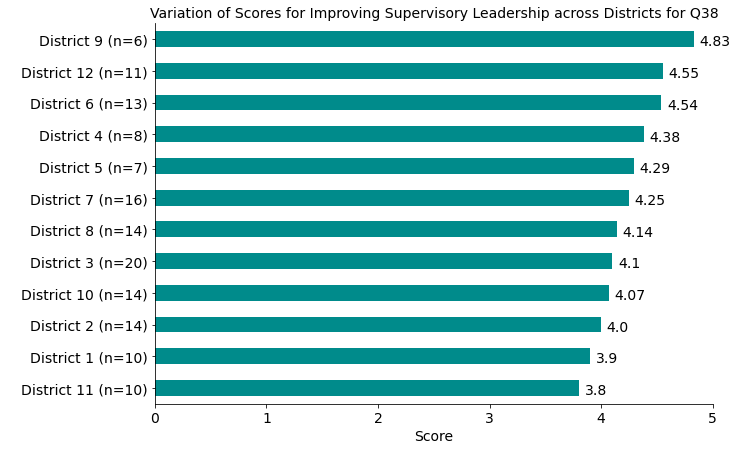

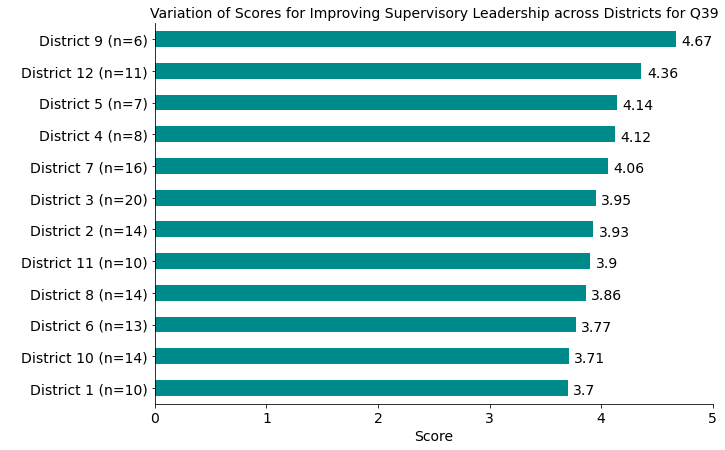

In [35]:
#For Loop to apply the LI function
questions = ['Q37','Q38','Q39'] 
ISL_Data=pd.DataFrame()
ImprovingSuoervisoryLeadership=pd.DataFrame()
ISL_KYTC_DataFrame=pd.DataFrame()
ISL_answer=[]
District_1_ISL=[]
District_2_ISL=[]
District_3_ISL=[]
District_4_ISL=[]
District_5_ISL=[]
District_6_ISL=[]
District_7_ISL=[]
District_8_ISL=[]
District_9_ISL=[]
District_10_ISL=[]
District_11_ISL=[]
District_12_ISL=[]
for question in questions:
    print(f"Answer for question: {question}")
    Improving_Supervisory_Leadership,KYTC,Question_Score_ISL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=ISL(df,question,'Q4')
    ISL_answer.append(Question_Score_ISL)
    District_1_ISL.append(D1)
    District_2_ISL.append(D2)
    District_3_ISL.append(D3)
    District_4_ISL.append(D4)
    District_5_ISL.append(D5)
    District_6_ISL.append(D6)
    District_7_ISL.append(D7)
    District_8_ISL.append(D8)
    District_9_ISL.append(D9)
    District_10_ISL.append(D10)
    District_11_ISL.append(D11)
    District_12_ISL.append(D12)
    ISL_KYTC_DataFrame=ISL_KYTC_DataFrame.append(KYTC_Per)
    #display(ISL_KYTC_DataFrame)
    ImprovingSuoervisoryLeadership=ImprovingSuoervisoryLeadership.append(KYTC)
    ISL_Data=ISL_Data.append(Improving_Supervisory_Leadership)
ISL_Percentage=ISL_KYTC_DataFrame[['%_Frequency Q37','%_Frequency Q38','%_Frequency Q39']].groupby(ISL_KYTC_DataFrame['Score']).first()
display(ISL_Percentage)
Questions=['Q37','Q38','Q39']
ISL_Percentage=ISL_Percentage.transpose().fillna(value=0).round(2)
ISL_Percentage
ISL_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
ISL_Percentage.index=Questions

In [ ]:
ImprovingSuoervisoryLeadership

In [ ]:
ISL_Mean=ImprovingSuoervisoryLeadership.groupby(ImprovingSuoervisoryLeadership["Score"]).mean()
ISL_Mean

In [ ]:
Questions=['Q37','Q38','Q39']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

ISL_District=pd.DataFrame([District_1_ISL,District_2_ISL,District_3_ISL,District_4_ISL,District_5_ISL,District_6_ISL,District_7_ISL,District_8_ISL,District_9_ISL,District_10_ISL,District_11_ISL,District_12_ISL])
ISL_District.transpose

ISL_District.columns=Questions
ISL_District.index=Districts_KYTC
District_ISL=ISL_District.reset_index()
display(District_ISL)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#00008B','#0000CD','#4169E1']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
ISL_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Improving Supervisory Leadership across Districts',fontsize=16)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,15])
plt.xticks(np.arange(0,20,5))
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("ISL_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in ISL_District.iterrows():
    ISL_District.loc[index,'Total_Score_ISL']=(row["Q37"]+row["Q38"]+row["Q39"])/3
ISL_District.to_excel('ISL_District.xlsx')
ISL_District

In [ ]:
Questions=['Q37','Q38','Q39']
Score_KYTC_ISL=pd.DataFrame(list(zip(questions,ISL_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_ISL
Score_KYTC_ISL['KYTC_Score']=pd.to_numeric(Score_KYTC_ISL['KYTC_Score']).round(2)
Score_KYTC_ISL=Score_KYTC_ISL.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_ISL)
ax=Score_KYTC_ISL.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Improving Supervisory Leadership ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_ISL['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_ISL.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
ISL_KYTC_Scores=Score_KYTC_ISL['KYTC_Score'].sum()/len(Score_KYTC_ISL)
ISL_KYTC_Scores


In [ ]:
ISL_Percentage

<Figure size 432x288 with 0 Axes>

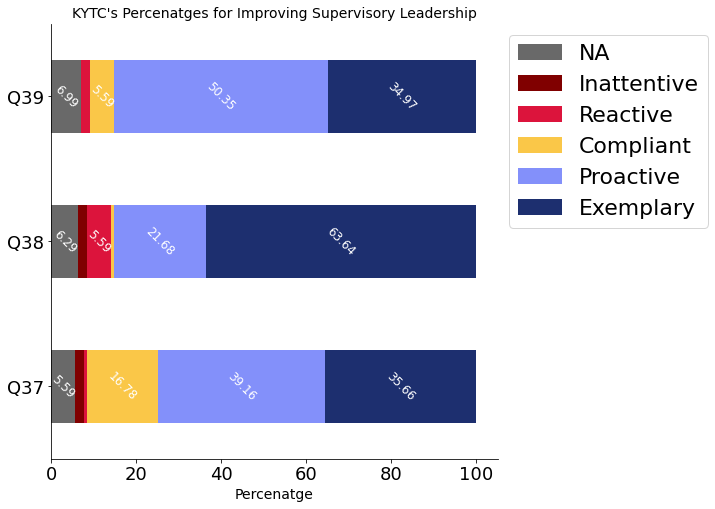

In [36]:
#KYTC Figure for Improving Supervisory Leadership
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=ISL_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for Improving Supervisory Leadership",fontsize=14)
list_values = (ISL_Percentage['NA'].tolist()
               +ISL_Percentage['Inattentive'].tolist()
               +ISL_Percentage['Reactive'].tolist()
               +ISL_Percentage['Compliant'].tolist()
               +ISL_Percentage['Proactive'].tolist()
               +ISL_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_ISL_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Leading Indicator: Empowering and Involving Employees {Q41,42,43}

In [37]:
def Recode_EIE(x): 
    if x =="Employees feel no sense of responsibility for their co-employees' or their own safety."or x=='Employee feedback regarding safety conditions and hazard reduction is not sought. They just want employees to "get the job done."'or x=='There are no safety committees.':
        return 1
    elif x =="Employees aren't engaged in promoting safety until after an accident occurs."or x== 'Employees are asked for safety advice and feedback after an injury or adverse safety event has occurred.'or x=='Safety committees are created only after an incident occurs and do not remain active very long.':
        return 2
    elif x =='Employees are engaged in promoting safety to the extent that is required.'or x== 'Employee feedback regarding safety is sought only when initiated by employees or during mandatory safety meetings.'or x=="Standing safety committees may exist but they don't carry much weight; meetings may last only a few minutes.":
        return 3   
    elif x =='Employees participate in all aspects of ensuring a safe job site, beginning at the planning and design stages.'or x=='Management actively involves employees in identifying hazards and solving safety problems by including them in daily pre-job safety and crew task/hazard analysis.'or x=='There is an active management-employee safety committee that provides suggestions and makes recommendations.':
        return 4
    elif x =="Employees are empowered and rewarded for going above and beyond to ensure a safe job site. Employees always feel responsible for their and their co-employees' safety."or x=='Management actively seeks employee input on safety. Safety and even non-safety meetings and walk-arounds focus on solving specific problems identified by employees and others.'or x=='The management-employee safety committee actively seeks suggestions from all employees on the job site and ensures that recommendations are seen through to completion.':
        return 5  
    else:
       
        return 0 

In [38]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def EIE (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_EIE=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_EIE)# to give a score for each sentence
    
    #3. Concat the data 
    Empowering_Involving_Employees=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Empowering_Involving_Employees.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display(Empowering_Involving_Employees)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank= Empowering_Involving_Employees['Score'].groupby(Empowering_Involving_Employees['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Empowering and Involving Employees across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_EIE=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_EIE,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Empowering_Involving_Employees,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q41','Q42','Q43']
    multiple_dfs(dfs,sheets,'EIE.xlsx', 1)
    
    return Empowering_Involving_Employees,KYTC,Question_Score_EIE,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q41


,District,Score,Freq
0,District 1,5,4
1,District 1,3,2
2,District 1,4,2
3,District 1,0,1
4,District 1,1,1
5,District 10,4,5
6,District 10,3,3
7,District 10,5,3
8,District 10,0,2
9,District 10,2,1


,Score,TotalFreq
3,0,8
4,1,6
5,2,3
1,3,43
0,4,58
2,5,25


The score of this question is: 3.4825174825174825 .


,Score,%_Frequency Q41
3,0,5.594
4,1,4.196
5,2,2.098
1,3,30.070
0,4,40.559
2,5,17.483


Answer for question: Q42


,District,Score,Freq
0,District 1,4,5
1,District 1,5,4
2,District 1,0,1
3,District 10,4,5
4,District 10,5,5
5,District 10,0,2
6,District 10,3,2
7,District 11,2,1
8,District 11,1,2
9,District 11,3,1


,Score,TotalFreq
3,0,11
5,1,5
4,2,5
2,3,23
0,4,54
1,5,45


The score of this question is: 3.6713286713286712 .


,Score,%_Frequency Q42
3,0,7.692
5,1,3.497
4,2,3.497
2,3,16.084
0,4,37.762
1,5,31.469


Answer for question: Q43


,District,Score,Freq
0,District 1,5,4
1,District 1,4,3
2,District 1,0,1
3,District 1,1,1
4,District 1,3,1
5,District 10,4,5
6,District 10,5,4
7,District 10,0,3
8,District 10,2,2
9,District 11,4,1


,Score,TotalFreq
2,0,18
5,1,2
3,2,9
4,3,6
0,4,68
1,5,40


The score of this question is: 3.5664335664335662 .


,Score,%_Frequency Q43
2,0,12.587
5,1,1.399
3,2,6.294
4,3,4.196
0,4,47.552
1,5,27.972


,%_Frequency Q41,%_Frequency Q42,%_Frequency Q43
Score,,,
0,5.594,7.692,12.587
1,4.196,3.497,1.399
2,2.098,3.497,6.294
3,30.070,16.084,4.196
4,40.559,37.762,47.552
5,17.483,31.469,27.972


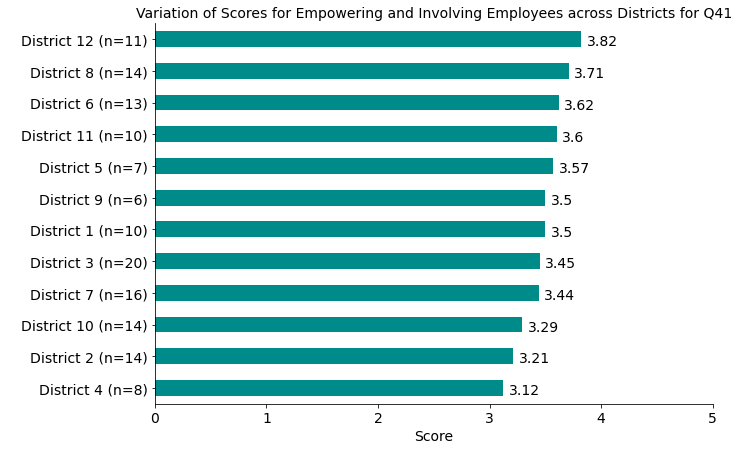

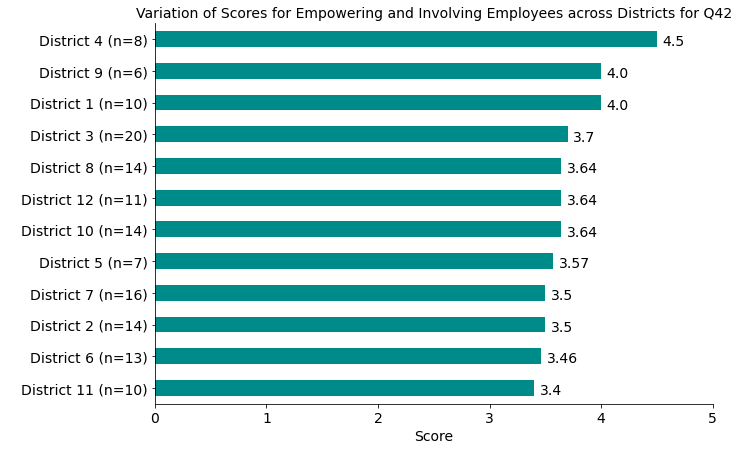

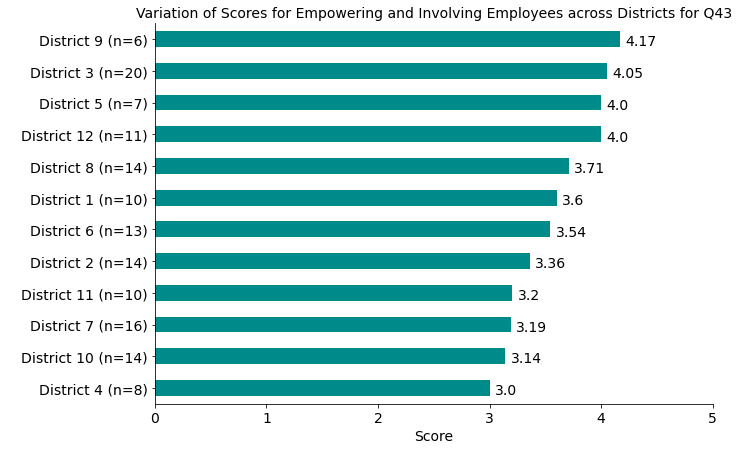

In [39]:
#For Loop to apply the LI function
questions = ['Q41','Q42','Q43']
EIE_Data=pd.DataFrame()
EmpoweringInvolvingEmployees=pd.DataFrame()
EIE_KYTC_DataFrame=pd.DataFrame()
EIE_answer=[]
District_1_EIE=[]
District_2_EIE=[]
District_3_EIE=[]
District_4_EIE=[]
District_5_EIE=[]
District_6_EIE=[]
District_7_EIE=[]
District_8_EIE=[]
District_9_EIE=[]
District_10_EIE=[]
District_11_EIE=[]
District_12_EIE=[]
for question in questions:
    print(f"Answer for question: {question}")
    Empowering_Involving_Employees,KYTC,Question_Score_EIE,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=EIE(df,question,'Q4')
    EIE_answer.append(Question_Score_EIE)
    District_1_EIE.append(D1)
    District_2_EIE.append(D2)
    District_3_EIE.append(D3)
    District_4_EIE.append(D4)
    District_5_EIE.append(D5)
    District_6_EIE.append(D6)
    District_7_EIE.append(D7)
    District_8_EIE.append(D8)
    District_9_EIE.append(D9)
    District_10_EIE.append(D10)
    District_11_EIE.append(D11)
    District_12_EIE.append(D12)
    EIE_KYTC_DataFrame=EIE_KYTC_DataFrame.append(KYTC_Per)
    #display(EIE_KYTC_DataFrame)
    EmpoweringInvolvingEmployees=EmpoweringInvolvingEmployees.append(KYTC)
    EIE_Data=EIE_Data.append(Empowering_Involving_Employees)
EIE_Percentage=EIE_KYTC_DataFrame[['%_Frequency Q41','%_Frequency Q42','%_Frequency Q43']].groupby(EIE_KYTC_DataFrame['Score']).first()
display(EIE_Percentage)
Questions=['Q41','Q42','Q43']
EIE_Percentage=EIE_Percentage.transpose().fillna(value=0).round(2)
EIE_Percentage
EIE_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
EIE_Percentage.index=Questions

In [ ]:
EmpoweringInvolvingEmployees

In [ ]:
EIE_Mean=EmpoweringInvolvingEmployees.groupby(EmpoweringInvolvingEmployees["Score"]).mean()
EIE_Mean

In [ ]:
Questions=['Q41','Q42','Q43']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

EIE_District=pd.DataFrame([District_1_EIE,District_2_EIE,District_3_EIE,District_4_EIE,District_5_EIE,District_6_EIE,District_7_EIE,District_8_EIE,District_9_EIE,District_10_EIE,District_11_EIE,District_12_EIE])
EIE_District.transpose

EIE_District.columns=Questions
EIE_District.index=Districts_KYTC
District_EIE=EIE_District.reset_index()
display(District_EIE)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#8A2BE2','#4B0082','#483D8B']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
EIE_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Empowering and Involving Employees across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,15])
plt.xticks(np.arange(0,20,5))
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("EIE_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in EIE_District.iterrows():
    EIE_District.loc[index,'Total_Score_EIE']=(row["Q41"]+row["Q42"]+row["Q43"])/3
EIE_District.to_excel('EIE_District.xlsx')
EIE_District

In [ ]:
Questions=['Q41','Q42','Q43']
Score_KYTC_EIE=pd.DataFrame(list(zip(questions,EIE_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_EIE
Score_KYTC_EIE['KYTC_Score']=pd.to_numeric(Score_KYTC_EIE['KYTC_Score']).round(2)
Score_KYTC_EIE=Score_KYTC_EIE.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_EIE)
ax=Score_KYTC_EIE.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Empowering and Involving Employees ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_EIE['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_EIE.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
EIE_KYTC_Scores=Score_KYTC_EIE['KYTC_Score'].sum()/len(Score_KYTC_EIE)
EIE_KYTC_Scores


In [ ]:
EIE_Percentage

<Figure size 432x288 with 0 Axes>

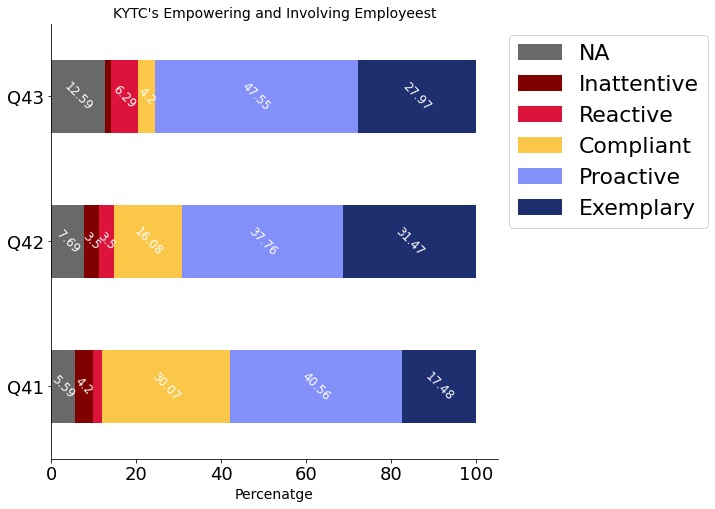

In [40]:
#KYTC Figure for Empowering and Involving Employees
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=EIE_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Empowering and Involving Employeest",fontsize=14)
list_values = (EIE_Percentage['NA'].tolist()
               +EIE_Percentage['Inattentive'].tolist()
               +EIE_Percentage['Reactive'].tolist()
               +EIE_Percentage['Compliant'].tolist()
               +EIE_Percentage['Proactive'].tolist()
               +EIE_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_EIE_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Leading Indicator: Improving communication {Q46,Q47,Q48}

In [41]:
def Recode_IC(x): 
    if x =="Management isn't interested in and therefore doesn't involve employees in safety discussions. No system exists for employees to voice concerns directly to management. Supervisors don't share crews' concerns with management."or x=="Injury and illness data are not collected unless there's a fatality that must be reported to OSHA and other entities."or x=='There are no safety-related communication efforts.':
        return 1
    elif x == 'Employees feel comfortable voicing concerns to a supervisor, but not directly to management. Management passes safety messages down to employees only when there is an incident, injury, or negative event.'or x=='Injury and illness data are collected, but they are only reviewed after an accident has occurred. Issues are not formally tracked nor are resolutions communicated across the organization.'or x=="Safety-related communication efforts occur only in response to an accident. And even that doesn't always happen.":
        return 2
    elif x =='Employees with concerns that involve a direct OSHA violation can raise the issue with their supervisor. Management shares safety information with supervisors and employees to the extent it is required (e.g. posting OSHA placards).'or x=='Injury and illness data are collected for the purpose of being compliant with OSHA requirements. Supervisors pass safety information onto their crew only when required by management.'or x=='Safety-related communication efforts meet OSHA requirements.':
        return 3   
    elif x =='Safety communication is a two-way street. Employees are encouraged to raise safety concerns at any time to supervisors or to management.'or x=='Injury/incident data are regularly and formally collected and shared with managers and supervisors; supervisors are encouraged but not required to share information with their employees'or x=="Safety-related communication efforts are made when there's a new standard or policy that needs to be followed.":
        return 4
    elif x =='Employees are continually encouraged and rewarded for raising safety concerns and suggesting improvements. Concerns are promptly addressed and resulting changes are communicated back to employees.'or x=='There are formal systems for gathering injury/incident data and for regularly sharing the information and follow-up improvement actions with managers, supervisors, and employees.'or x=='Safety-related communication efforts are formalized both vertically and horizontally throughout the Cabinet and on job sites.':
        return 5  
    else:
        return 0

In [42]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def IC (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_TAL=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_IC)# to give a score for each sentence
    
    #3. Concat the data 
    Improving_Communication=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Improving_Communication.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display(Improving_Communication)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank= Improving_Communication['Score'].groupby(Improving_Communication['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for Improving_Communication across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_IC=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_IC,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Improving_Communication,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q46','Q47','Q48']
    multiple_dfs(dfs,sheets,'IC.xlsx', 1)
    
    return Improving_Communication,KYTC,Question_Score_IC,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q46


,District,Score,Freq
0,District 1,4,6
1,District 1,5,3
2,District 1,0,1
3,District 10,4,9
4,District 10,5,3
5,District 10,0,2
6,District 11,5,2
7,District 11,2,1
8,District 11,4,5
9,District 11,1,2


,Score,TotalFreq
3,0,8
5,1,5
4,2,7
2,3,11
0,4,90
1,5,22


The score of this question is: 3.6503496503496504 .


,Score,%_Frequency Q46
3,0,5.594
5,1,3.497
4,2,4.895
2,3,7.692
0,4,62.937
1,5,15.385


,Score,%_Frequency Q46
3,0,5.594
5,1,3.497
4,2,4.895
2,3,7.692
0,4,62.937
1,5,15.385


Answer for question: Q47


,District,Score,Freq
0,District 1,5,5
1,District 1,4,3
2,District 1,0,1
3,District 1,3,1
4,District 10,5,9
5,District 10,0,2
6,District 10,4,2
7,District 10,3,1
8,District 11,2,1
9,District 11,1,1


,Score,TotalFreq
3,0,10
5,1,2
4,2,3
2,3,22
1,4,39
0,5,67


The score of this question is: 3.9510489510489513 .


,Score,%_Frequency Q47
3,0,6.993
5,1,1.399
4,2,2.098
2,3,15.385
1,4,27.273
0,5,46.853


,Score,%_Frequency Q46,%_Frequency Q47
3,0,5.594,NaN
5,1,3.497,NaN
4,2,4.895,NaN
2,3,7.692,NaN
0,4,62.937,NaN
1,5,15.385,NaN
3,0,NaN,6.993
5,1,NaN,1.399
4,2,NaN,2.098
2,3,NaN,15.385


Answer for question: Q48


,District,Score,Freq
0,District 1,4,5
1,District 1,5,3
2,District 1,0,2
3,District 10,5,6
4,District 10,4,4
5,District 10,0,2
6,District 10,3,2
7,District 11,3,1
8,District 11,0,1
9,District 11,2,2


,Score,TotalFreq
3,0,12
4,2,5
2,3,21
1,4,51
0,5,54


The score of this question is: 3.825174825174825 .


,Score,%_Frequency Q48
3,0,8.392
4,2,3.497
2,3,14.685
1,4,35.664
0,5,37.762


,Score,%_Frequency Q46,%_Frequency Q47,%_Frequency Q48
3,0,5.594,NaN,NaN
5,1,3.497,NaN,NaN
4,2,4.895,NaN,NaN
2,3,7.692,NaN,NaN
0,4,62.937,NaN,NaN
1,5,15.385,NaN,NaN
3,0,NaN,6.993,NaN
5,1,NaN,1.399,NaN
4,2,NaN,2.098,NaN
2,3,NaN,15.385,NaN


,%_Frequency Q46,%_Frequency Q47,%_Frequency Q48
Score,,,
0,5.594,6.993,8.392
1,3.497,1.399,NaN
2,4.895,2.098,3.497
3,7.692,15.385,14.685
4,62.937,27.273,35.664
5,15.385,46.853,37.762


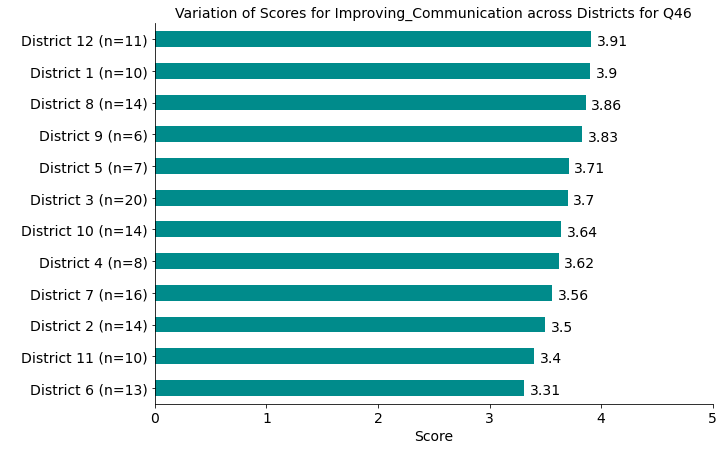

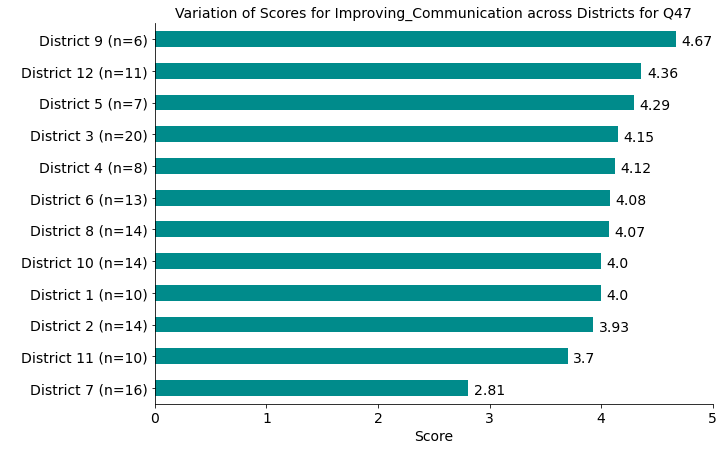

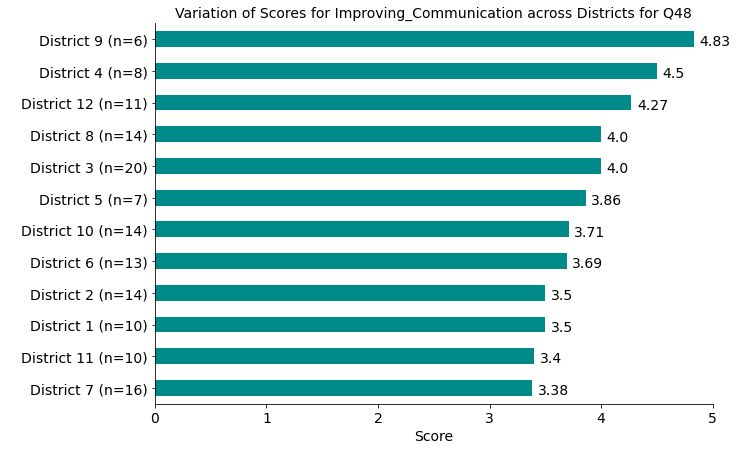

In [43]:
#For Loop to apply the LI function
questions = ['Q46','Q47','Q48'] 
IC_Data=pd.DataFrame()
ImprovingCommunication=pd.DataFrame()
IC_KYTC_DataFrame=pd.DataFrame()
IC_answer=[]
District_1_IC=[]
District_2_IC=[]
District_3_IC=[]
District_4_IC=[]
District_5_IC=[]
District_6_IC=[]
District_7_IC=[]
District_8_IC=[]
District_9_IC=[]
District_10_IC=[]
District_11_IC=[]
District_12_IC=[]
for question in questions:
    print(f"Answer for question: {question}")
    Improving_Communication,KYTC,Question_Score_IC,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=IC(df,question,'Q4')
    IC_answer.append(Question_Score_IC)
    District_1_IC.append(D1)
    District_2_IC.append(D2)
    District_3_IC.append(D3)
    District_4_IC.append(D4)
    District_5_IC.append(D5)
    District_6_IC.append(D6)
    District_7_IC.append(D7)
    District_8_IC.append(D8)
    District_9_IC.append(D9)
    District_10_IC.append(D10)
    District_11_IC.append(D11)
    District_12_IC.append(D12)
    IC_KYTC_DataFrame=IC_KYTC_DataFrame.append(KYTC_Per)
    display(IC_KYTC_DataFrame)
    ImprovingCommunication=ImprovingCommunication.append(KYTC)
    IC_Data=IC_Data.append(Improving_Communication)
IC_Percentage=IC_KYTC_DataFrame[['%_Frequency Q46','%_Frequency Q47','%_Frequency Q48']].groupby(IC_KYTC_DataFrame['Score']).first()
display(IC_Percentage)
Questions=['Q46','Q47','Q48']
IC_Percentage=IC_Percentage.transpose().fillna(value=0).round(2)
IC_Percentage
IC_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
IC_Percentage.index=Questions

In [ ]:
ImprovingCommunication

In [ ]:
IC_Mean=ImprovingCommunication.groupby(ImprovingCommunication["Score"]).mean()
IC_Mean

In [ ]:
Questions=['Q46','Q47','Q48']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

IC_District=pd.DataFrame([District_1_IC,District_2_IC,District_3_IC,District_4_IC,District_5_IC,District_6_IC,District_7_IC,District_8_IC,District_9_IC,District_10_IC,District_11_IC,District_12_IC])
IC_District.transpose

IC_District.columns=Questions
IC_District.index=Districts_KYTC
District_IC=DMC_District.reset_index()
display(District_IC)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#8B008B','#BA55D3','#FF00FF']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
IC_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Improving Communication across Districts',fontsize=18)
plt.xlim([0,15])
plt.xticks(np.arange(0,20,5))
plt.xlabel("Score",fontsize=22)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("IC_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in IC_District.iterrows():
    IC_District.loc[index,'Total_Score_IC']=(row["Q46"]+row["Q47"]+row["Q48"])/3

IC_District.to_excel('IC_District.xlsx')
IC_District

In [ ]:
Questions=['Q46','Q47','Q48']
Score_KYTC_IC=pd.DataFrame(list(zip(questions,IC_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_IC
Score_KYTC_IC['KYTC_Score']=pd.to_numeric(Score_KYTC_IC['KYTC_Score']).round(2)
Score_KYTC_IC=Score_KYTC_IC.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_IC)
ax=Score_KYTC_IC.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Improving Communication ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_IC['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_IC.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
IC_KYTC_Scores=Score_KYTC_IC['KYTC_Score'].sum()/len(Score_KYTC_IC)
IC_KYTC_Scores


In [ ]:
IC_Percentage

<Figure size 432x288 with 0 Axes>

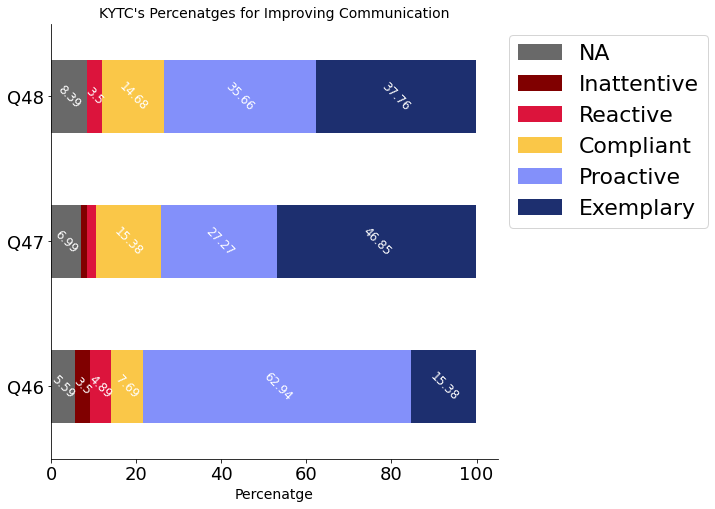

In [44]:
#KYTC Figure for Improving Communication
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=IC_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for Improving Communication",fontsize=14)
list_values = (IC_Percentage['NA'].tolist()
               +IC_Percentage['Inattentive'].tolist()
               +IC_Percentage['Reactive'].tolist()
               +IC_Percentage['Compliant'].tolist()
               +IC_Percentage['Proactive'].tolist()
               +IC_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_IC_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Safety Climate Indicator: Training at All Levels {Q50,Q51,Q52,Q53,Q54,Q55}

In [45]:
def Recode_TAL(x): 
    if x=='Does not provide formal safety training. Assumes employees are trained properly when they come on-site.'or x=='No certification is required for employees or supervisors.'or x=='Training, if implemented at all, is very general.'or x=='Neither training nor training needs assessments are conducted.'or x=='There is no training verification process. Fraudulent training cards may even be accepted.'or x=='Trainers have no formal qualifications.':
        return 1
    elif x =='Only provides formal safety training in response to accidents; commitment to training diminishes over time.'or x=='Employees and supervisors can voluntarily pursue the OSHA 10-hour certificate.'or x=='The training that exists is aimed exclusively at individual employee behavior and is developed in response to an accident.'or x=='Training needs assessments focus on recent accidents only (e.g. a ladder injury will result in training on ladder safety).'or x=='Training cards or certificates are only investigated after an incident has occurred.'or x=='Because of job site experience alone, senior level employees (e.g. superintendents) are asked to conduct safety training.':
        return 2
    elif x =='Only provides formal safety training as often as required by OSHA. Majority of training is provided via toolbox talks.'or x=='Employees and supervisors are required to have only the OSHA 10-hour certificate.'or x=='An off-the-shelf curriculum is used to meet OSHA and management system training requirements.'or x=='Training needs are based on OSHA standards.'or x=='Training is verified only to the extent required by OSHA.'or x=='A formal safety curriculum is developed and administered by trainers who meet minimal OSHA qualifications.':
        return 3   
    elif x =='Provides frequent formal safety training for employees, supervisors, and managers.'or x=='Employees are required to obtain the OSHA 10-hour certificate. Supervisors are required to obtain the OSHA 30-hour certificate.'or x=='Supervisors and managers get training on safety leadership skills, as well as OSHA standards.'or x=='Training needs are typically identified by supervisors but may also be initiated by employees.'or x=='Training for all employees, including sub-contractors, is verified regularly.'or x=='Safety curriculum is developed by highly qualified trainers.':
        return 4
    elif x =='Ongoing safety training is viewed as being critical for continuous improvement. Provides frequent formal safety training to all employees.'or x=='In addition to the OSHA 30-hour certificate, supervisors are strongly encouraged and provided with resources to obtain other certifications (e.g. Safety Trained Supervisor (STS)).'or x=='Supervisor-led training as well as peer training is implemented. Training has a heavy emphasis on leadership skills.'or x=='Employees are integral to identifying training needs and developing materials.'or x=='Training for all employees, including all sub-contractors, is verified before work is conducted on every project. Knowledge and skill competence are regularly assessed.'or x== 'Safety curriculum is developed and administered by highly qualified and experienced content experts with knowledge of adult learning principles.':
        return 5  
    else:
        return 0

In [46]:
#Function to calcualte the sore of each question /District and Overall Score/LI/District and KYTC
def TAL (data_base,data_question,data_district): #This function will take the dataframe,Survey Question,District Question
    Question_Score_TAL=pd.DataFrame(columns=['Question','QuestionScore'])
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['a','b','c'])
    empty_base['a']=data_base[data_district]
    empty_base['b']=data_base[data_question]
    empty_base['c']=empty_base['b']
    
    #2. create a score 
    empty_base['c']=empty_base['c'].apply(Recode_TAL)# to give a score for each sentence
    
    #3. Concat the data 
    Training_All_Levels=pd.concat([empty_base['a'],empty_base['b'],empty_base['c']],axis=1).sort_values(by='a')
    Training_All_Levels.columns=['District', 'Rubric', 'Score']# Rename the columns 
    #display( Training_All_Levels)# to display as a DataFrame
    
    #4. Rank District by Question 
    District_Rank=Training_All_Levels['Score'].groupby(Training_All_Levels['District']).value_counts().to_frame('Freq').sort_values(by='District')
    District_Rank=District_Rank.reset_index()#so we can call the columns from teh resulting Data Frame
    District_Rank.columns=['District', 'Score', 'Freq']
    display(District_Rank)
    
    #5 Calculate a score for each District
    District_Rank_TotalFreq=District_Rank['Freq'].groupby(District_Rank['District']).sum()
    District_Rank_TotalFreq=District_Rank_TotalFreq.reset_index()
    District_Rank_TotalFreq.columns=['District','Total_Freq']
    #display(District_Rank_TotalFreq)
    District_Rank['Value']=(District_Rank['Score']*District_Rank['Freq'])
    District_Rank_Value=District_Rank['Value'].groupby(District_Rank['District']).sum()
    District_Rank_Value=District_Rank_Value.reset_index()
    #display(District_Rank_Value)
    District_Score=pd.merge(District_Rank_TotalFreq,District_Rank_Value,on='District')
    District_Score['Score']=District_Score['Value']/District_Score['Total_Freq']
    #display(District_Score)
    
    #6 Create a Graph for the District Score/Question 
    District_Score['Y-axis']=District_Score['District']+' (n='+District_Score['Total_Freq'].astype(str)+')'
    District_Score['Score']=pd.to_numeric(District_Score['Score']).round(2)
    District_Score=District_Score.sort_values(by='Score',ascending=True)
    #display(District_Score)
    ax=District_Score.plot.barh(x='Y-axis', y='Score',figsize=(10,7),fontsize=14,legend=False,color="darkcyan")
    plt.xlim([0, 5]) #x-axis limits
    plt.xlabel("Score",fontsize=14) #x-axis title
    plt.ylabel(" ") #remove y-axis title
    plt.title('Variation of Scores for  Training at All Levels across Districts for '+data_question,fontsize=14)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    right_side = ax.spines["right"]
    right_side.set_visible(False) # to remove teh boundaries 
    #for labels:
    for i, v in enumerate(District_Score['Score']):
        ax.text(v + 0.05, i - 0.2, str(v), fontsize=14)
        plt.savefig(data_question+'.svg',bbox_inches = 'tight')
        
    #10. Score/Question/District
    District=District_Score.sort_values(by='District',ascending=True)
    #display(District)
    D1=District.iat[0,3]
    D10=District.iat[1,3]
    D11=District.iat[2,3]
    D12=District.iat[3,3]
    D2=District.iat[4,3]
    D3=District.iat[5,3]
    D4=District.iat[6,3]
    D5=District.iat[7,3]
    D6=District.iat[8,3]
    D7=District.iat[9,3]
    D8=District.iat[10,3]
    D9=District.iat[11,3]
    
    #7 Calculate Score for  KYTC 
    KYTC_base=empty_base['c'].value_counts()
    KYTC_base=KYTC_base.reset_index()
    KYTC_base.columns=['Score','TotalFreq']
    KYTC=KYTC_base.sort_values(by='Score',ascending=True)
    display(KYTC)
    Question_Score_TAL=((KYTC['Score']*KYTC['TotalFreq']).sum()/(KYTC['TotalFreq'].sum()))
    print('The score of this question is:',Question_Score_TAL,'.')
    
    #9. Graphics/KYTC (Stacked Graph for the scale of indicator for KYTC)
    KYTC_Per=empty_base['c'].value_counts(normalize=True).mul(100).round(3)#frequency (%)
    KYTC_Per=KYTC_Per.reset_index()
    KYTC_Per.rename(columns={'c':'%_Frequency '+data_question,'index':'Score'},inplace=True)
    KYTC_Per=KYTC_Per.sort_values(by='Score',ascending=True)
    display(KYTC_Per)
    
    #8. Save to an Excel Workbook with each question on a sheet
    # list of dataframes
    dfs = [Training_All_Levels,District_Rank,District_Score,KYTC]
    # run function
    sheets=['Q50','Q51','Q52','Q53','Q54','Q55']
    multiple_dfs(dfs,sheets,'TAL.xlsx', 1)
    
    return Training_All_Levels,KYTC,Question_Score_TAL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per

Answer for question: Q50


,District,Score,Freq
0,District 1,5,5
1,District 1,0,2
2,District 1,4,2
3,District 1,3,1
4,District 10,4,6
5,District 10,5,6
6,District 10,0,2
7,District 11,3,1
8,District 11,2,2
9,District 11,5,4


,Score,TotalFreq
3,0,10
4,2,2
2,3,18
0,4,60
1,5,53


The score of this question is: 3.937062937062937 .


,Score,%_Frequency Q50
3,0,6.993
4,2,1.399
2,3,12.587
0,4,41.958
1,5,37.063


Answer for question: Q51


,District,Score,Freq
0,District 1,5,4
1,District 1,4,3
2,District 1,0,1
3,District 1,1,1
4,District 1,3,1
5,District 10,3,7
6,District 10,5,3
7,District 10,0,2
8,District 10,4,2
9,District 11,5,1


,Score,TotalFreq
3,0,14
5,1,1
4,2,2
0,3,78
1,4,26
2,5,22


The score of this question is: 3.167832167832168 .


,Score,%_Frequency Q51
3,0,9.790
5,1,0.699
4,2,1.399
0,3,54.545
1,4,18.182
2,5,15.385


Answer for question: Q52


,District,Score,Freq
0,District 1,4,4
1,District 1,0,2
2,District 1,5,2
3,District 1,1,1
4,District 1,3,1
5,District 10,4,7
6,District 10,5,4
7,District 10,0,3
8,District 11,2,1
9,District 11,3,2


,Score,TotalFreq
3,0,13
5,1,2
4,2,2
2,3,15
0,4,85
1,5,26


The score of this question is: 3.6433566433566433 .


,Score,%_Frequency Q52
3,0,9.091
5,1,1.399
4,2,1.399
2,3,10.490
0,4,59.441
1,5,18.182


Answer for question: Q53


,District,Score,Freq
0,District 1,4,4
1,District 1,5,3
2,District 1,0,2
3,District 1,3,1
4,District 10,4,5
5,District 10,0,3
6,District 10,5,3
7,District 10,3,2
8,District 10,2,1
9,District 11,1,1


,Score,TotalFreq
3,0,11
5,1,2
4,2,7
1,3,31
0,4,65
2,5,27


The score of this question is: 3.5244755244755246 .


,Score,%_Frequency Q53
3,0,7.692
5,1,1.399
4,2,4.895
1,3,21.678
0,4,45.455
2,5,18.881


Answer for question: Q54


,District,Score,Freq
0,District 1,4,4
1,District 1,0,2
2,District 1,5,2
3,District 1,1,1
4,District 1,3,1
5,District 10,4,6
6,District 10,5,3
7,District 10,0,2
8,District 10,3,2
9,District 10,2,1


,Score,TotalFreq
3,0,20
5,1,2
4,2,3
2,3,31
0,4,56
1,5,31


The score of this question is: 3.3566433566433567 .


,Score,%_Frequency Q54
3,0,13.986
5,1,1.399
4,2,2.098
2,3,21.678
0,4,39.161
1,5,21.678


Answer for question: Q55


,District,Score,Freq
0,District 1,4,4
1,District 1,5,4
2,District 1,0,1
3,District 1,1,1
4,District 10,5,7
5,District 10,4,3
6,District 10,0,2
7,District 10,3,2
8,District 11,2,2
9,District 11,5,1


,Score,TotalFreq
3,0,14
5,1,1
4,2,13
2,3,22
0,4,53
1,5,40


The score of this question is: 3.5314685314685317 .


,Score,%_Frequency Q55
3,0,9.790
5,1,0.699
4,2,9.091
2,3,15.385
0,4,37.063
1,5,27.972


,%_Frequency Q50,%_Frequency Q51,%_Frequency Q52,%_Frequency Q53,%_Frequency Q54,%_Frequency Q55
Score,,,,,,
0,6.993,9.790,9.091,7.692,13.986,9.790
1,NaN,0.699,1.399,1.399,1.399,0.699
2,1.399,1.399,1.399,4.895,2.098,9.091
3,12.587,54.545,10.490,21.678,21.678,15.385
4,41.958,18.182,59.441,45.455,39.161,37.063
5,37.063,15.385,18.182,18.881,21.678,27.972


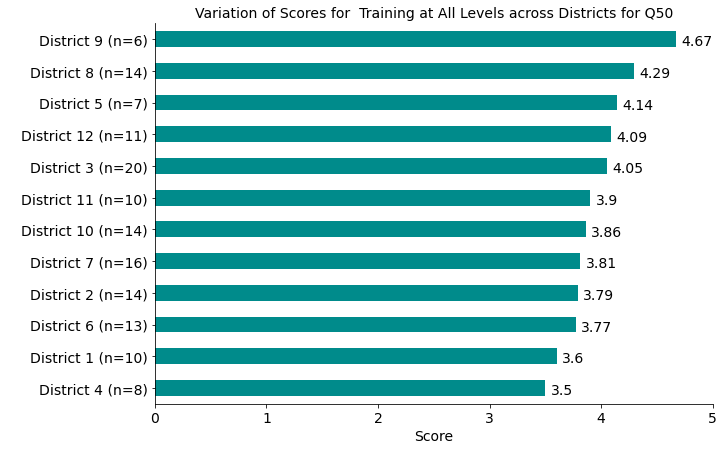

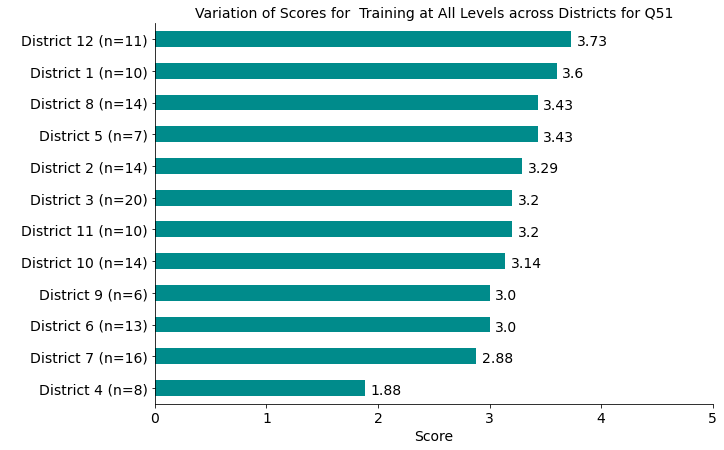

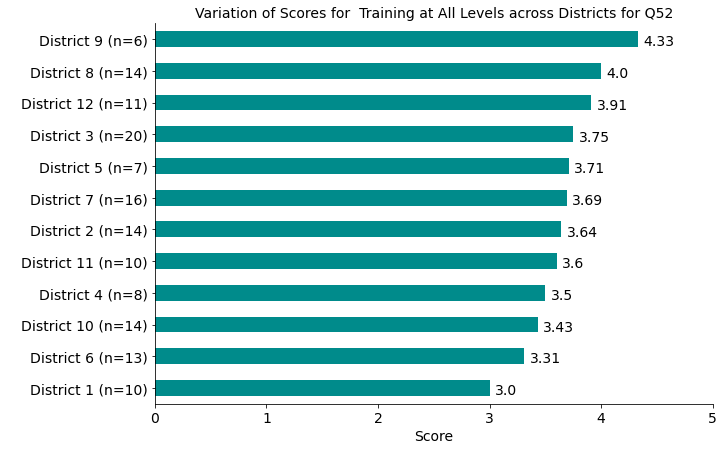

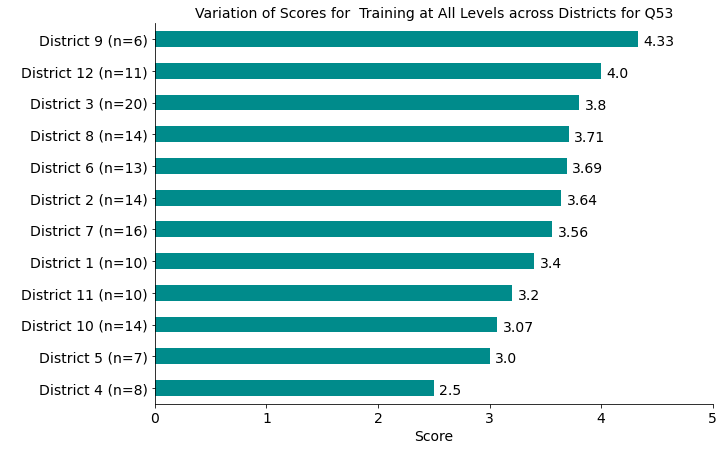

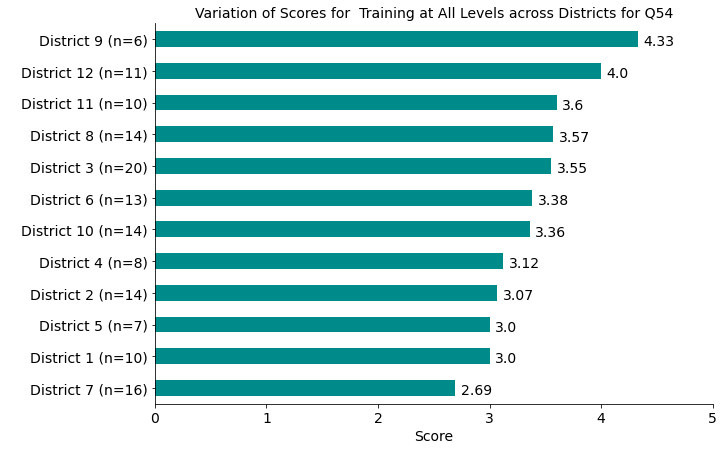

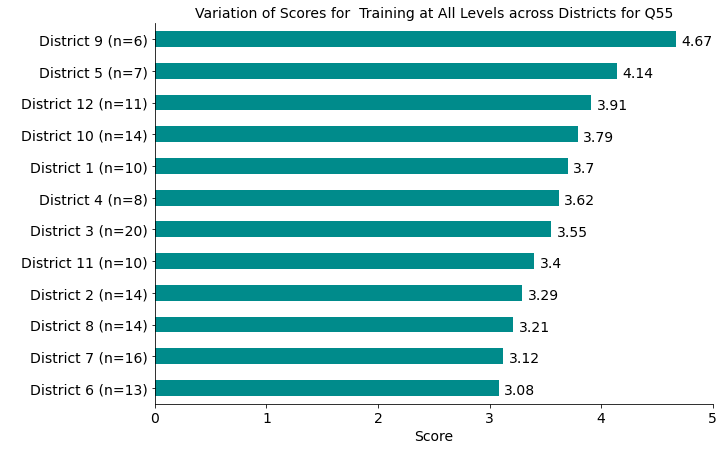

In [47]:
#For Loop to apply the LI function
questions = ['Q50','Q51','Q52','Q53','Q54','Q55'] 
TAL_Data=pd.DataFrame()
TrainingAllLevels=pd.DataFrame()
TAL_KYTC_DataFrame=pd.DataFrame()
TAL_answer=[]
District_1_TAL=[]
District_2_TAL=[]
District_3_TAL=[]
District_4_TAL=[]
District_5_TAL=[]
District_6_TAL=[]
District_7_TAL=[]
District_8_TAL=[]
District_9_TAL=[]
District_10_TAL=[]
District_11_TAL=[]
District_12_TAL=[]
for question in questions:
    print(f"Answer for question: {question}")
    Training_All_Levels,KYTC,Question_Score_TAL,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,KYTC_Per=TAL(df,question,'Q4')
    TAL_answer.append(Question_Score_TAL)
    District_1_TAL.append(D1)
    District_2_TAL.append(D2)
    District_3_TAL.append(D3)
    District_4_TAL.append(D4)
    District_5_TAL.append(D5)
    District_6_TAL.append(D6)
    District_7_TAL.append(D7)
    District_8_TAL.append(D8)
    District_9_TAL.append(D9)
    District_10_TAL.append(D10)
    District_11_TAL.append(D11)
    District_12_TAL.append(D12)
    TAL_KYTC_DataFrame=TAL_KYTC_DataFrame.append(KYTC_Per)
    #display(TAL_KYTC_DataFrame)
    TrainingAllLevels=TrainingAllLevels.append(KYTC)
    TAL_Data=TAL_Data.append(Training_All_Levels)
TAL_Percentage=TAL_KYTC_DataFrame[['%_Frequency Q50','%_Frequency Q51','%_Frequency Q52','%_Frequency Q53','%_Frequency Q54','%_Frequency Q55']].groupby(TAL_KYTC_DataFrame['Score']).first()
display(TAL_Percentage)
Questions=['Q50','Q51','Q52','Q53','Q54','Q55']
TAL_Percentage=TAL_Percentage.transpose().fillna(value=0).round(2)
TAL_Percentage
TAL_Percentage.columns=(['NA','Inattentive','Reactive','Compliant','Proactive','Exemplary'])
TAL_Percentage.index=Questions

In [ ]:
TrainingAllLevels

In [ ]:
TAL_Mean=TrainingAllLevels.groupby(TrainingAllLevels["Score"]).mean()
TAL_Mean

In [ ]:
Questions=['Q50','Q51','Q52','Q53','Q54','Q55']
Districts_KYTC=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12']

TAL_District=pd.DataFrame([District_1_TAL,District_2_TAL,District_3_TAL,District_4_TAL,District_5_TAL,District_6_TAL,District_7_TAL,District_8_TAL,District_9_TAL,District_10_TAL,District_11_TAL,District_12_TAL])
TAL_District.transpose

TAL_District.columns=Questions
TAL_District.index=Districts_KYTC
District_TAL=TAL_District.reset_index()
display(District_TAL)
#Plot the score of Districts across Questions of Leading Indicator Employee Risk Perception 
colors = ['#FFD700','#B8860B','#DAA520','#F0E68C','#FFFF00','#808000']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
TAL_District.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Training at All Levels across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,30])
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("TAL_District.svg",bbox_inches = 'tight')

#Total Score of each district for the Leading Indicator Employee Risk Perception 
for index,row in TAL_District.iterrows():
    TAL_District.loc[index,'Total_Score_TAL']=(row["Q50"]+row["Q51"]+row["Q52"]+row["Q53"]+row["Q54"]+row["Q55"])/6

TAL_District.to_excel('TAL_District.xlsx')
TAL_District

In [ ]:
Questions=['Q50','Q51','Q52','Q53','Q54','Q55']
Score_KYTC_TAL=pd.DataFrame(list(zip(questions,TAL_answer)),columns=['Question','KYTC_Score'])
Score_KYTC_TAL
Score_KYTC_TAL['KYTC_Score']=pd.to_numeric(Score_KYTC_TAL['KYTC_Score']).round(2)
Score_KYTC_TAL=Score_KYTC_TAL.sort_values(by='KYTC_Score',ascending=True)
display(Score_KYTC_TAL)
ax=Score_KYTC_TAL.plot.barh(x='Question',y='KYTC_Score',figsize=(10,10),fontsize=14,legend=False,color="darkblue")
plt.xlim([0, 5]) #x-axis limits
plt.xlabel("KYTC Scores for Training at All Levels ",fontsize=14) #x-axis title
plt.ylabel(" ") #remove y-axis title
#plt.title('Variation of Scores for Employee Risk Perception across KYTC',fontsize=14)
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side = ax.spines["right"]
right_side.set_visible(False) # to remove teh boundaries 
#for labels:
for i, v in enumerate(Score_KYTC_DMC['KYTC_Score']):
    ax.text(v + 0.05, i - 0.05, str(v), fontsize=16)
    plt.savefig('KYTC_TAL.svg',bbox_inches = 'tight')
#Total Score of KYTC for the Leading Indicator Employee Risk Perception 
TAL_KYTC_Scores=Score_KYTC_TAL['KYTC_Score'].sum()/len(Score_KYTC_TAL)
TAL_KYTC_Scores


In [ ]:
TAL_Percentage

<Figure size 432x288 with 0 Axes>

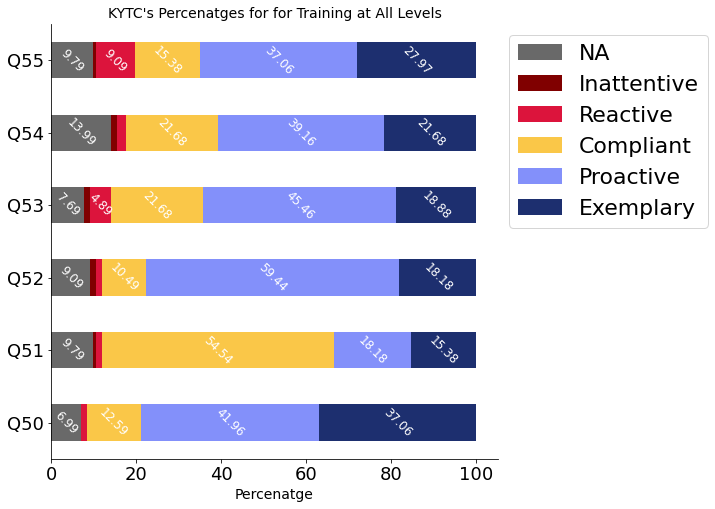

In [48]:
#KYTC Figure for for Training at All Levels
colors = ['#696969','#800000','#DC143C','#FAC748','#8390FA','#1D2F6F',]
plt.figure()
ax=TAL_Percentage.plot(kind='barh',stacked=True,color=colors,figsize=(8,8),fontsize=18)
plt.xlabel(("Percenatge"),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("KYTC's Percenatges for for Training at All Levels",fontsize=14)
list_values = (TAL_Percentage['NA'].tolist()
               +TAL_Percentage['Inattentive'].tolist()
               +TAL_Percentage['Reactive'].tolist()
               +TAL_Percentage['Compliant'].tolist()
               +TAL_Percentage['Proactive'].tolist()
               +TAL_Percentage['Exemplary'].tolist())

for rect, value in zip(ax.patches, list_values):
    if value>=3:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', color='#FFFFFF', fontsize=12,rotation=-45)

plt.savefig("KYTC_TAL_Stacked.svg",bbox_inches = 'tight')
plt.show()

## Aggregated Data for all Leading Indicators for Districts and for KYTC 

In [ ]:
ERP_District 
ERP_KYTC_Scores

DMC_District
DMC_KYTC_Scores

AIS_District
AIS_KYTC_Scores

AAL_District
AAL_KYTC_Scores

ISL_District
ISL_KYTC_Scores

EIE_District
EIE_KYTC_Scores

IC_District
IC_KYTC_Scores

TAL_District
TAL_KYTC_Scores

In [ ]:
District_Data=pd.DataFrame(columns=['Employee Risk Perception',
                                    'Demonstarting Management Commitment',
                                    'Aligning & Integrating Safety',
                                   'Accountability at All Levels',
                                    'Improving Supervisory Leadership',
                                    'Empowering & Involving employees',
                                    'Improving Communication',
                                    'Training at All Levels'])
District_Data['Employee Risk Perception']=ERP_District['Total_Score_ERP']
District_Data['Demonstarting Management Commitment']=DMC_District['Total_Score_DMC']
District_Data['Aligning & Integrating Safety']=AIS_District['Total_Score_AIS']
District_Data['Accountability at All Levels']=AAL_District['Total_Score_AAL']
District_Data['Improving Supervisory Leadership']=ISL_District['Total_Score_ISL']
District_Data['Empowering & Involving employees']=EIE_District['Total_Score_EIE']
District_Data['Improving Communication']=IC_District['Total_Score_IC']
District_Data['Training at All Levels']=TAL_District['Total_Score_TAL']
District_Data

In [ ]:
#Plot the score of Districts  
colors = ['#DC143C','#7FFF00','#00FFFF','#4169E1','#BA55D3','#8A2BE2','#FF00FF','#FFFF00']
#'#FF7F50','#CD5C5C','#FA8072'
plt.figure()
District_Data.plot(kind='barh',stacked=True,color=colors,figsize=(10,10),fontsize=22)
plt.title('Variation of Scores for Safety Climate Leading Indicators across Districts',fontsize=18)
plt.xlabel("Score",fontsize=22)
plt.xlim([0,40])
#plt.xticks(np.arange(0,42,2))
plt.legend(bbox_to_anchor=(1,1),loc="best",fontsize=22) 
#bbox_transform=gca().transFigure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("SafetyClimate_District_Stacked.svg",bbox_inches = 'tight')


In [ ]:
#Total Score of each district for Safety Climate 
for index,row in District_Data.iterrows():
    District_Data.loc[index,'Safety Climate Score']=(row["Employee Risk Perception"]+row["Demonstarting Management Commitment"]+row["Aligning & Integrating Safety"]+row["Accountability at All Levels"]+row["Improving Supervisory Leadership"]+row["Empowering & Involving employees"]+row["Improving Communication"]+row["Training at All Levels"])/8
District_Data.to_excel('District_Data.xlsx')
District_Data=District_Data.reset_index()
District_Data

In [ ]:
# Change color with c and alpha
District_Data['Safety Climate Score']=pd.to_numeric(District_Data['Safety Climate Score']).round(2)
# x=['District1','District2','District3','District4','District5','District6','District7','District8','District9','District10','Dstrict11','District12'] 

# The horizontal plot is made using the hline function
plt.figure(figsize=(10,10))
plt.hlines(y=range(0,len(District_Data.index)+1), xmin=0, xmax=5, color='grey')
plt.plot(District_Data["Safety Climate Score"],District_Data["index"],"o",markersize=22,color='#00008B')
plt.xlabel('Safety Climate Score',fontsize=18)
plt.xticks(size = 18)
plt.xticks(np.arange(0,6,1))
plt.yticks(size = 18)
# plt.title('Safety Climate Score for Districts', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for i, v in enumerate(District_Data["Safety Climate Score"]):
    plt.text(v+0.5 , i+0.2 , str(v), fontsize=16)
    plt.savefig("SafetyClimate_District.svg",bbox_inches = 'tight')

# Show the plot
plt.show()

In [ ]:
ERP_KYTC_Scores.round(2)

In [ ]:
KYTC_Data=pd.DataFrame(columns=['Employee Risk Perception',
                                'Demonstarting Management Commitment',
                                'Aligning & Integrating Safety',
                                'Accountability at All Levels',
                                'Improving Supervisory Leadership',
                                'Empowering & Involving employees',
                                'Improving Communication',
                                'Training at All Levels'])
KYTC_Data=KYTC_Data.append({'Employee Risk Perception':ERP_KYTC_Scores,'Demonstarting Management Commitment':DMC_KYTC_Scores,'Aligning & Integrating Safety':AIS_KYTC_Scores,'Accountability at All Levels':AAL_KYTC_Scores,'Improving Supervisory Leadership':ISL_KYTC_Scores,'Empowering & Involving employees':EIE_KYTC_Scores,'Improving Communication':IC_KYTC_Scores,'Training at All Levels':TAL_KYTC_Scores},ignore_index=True)
KYTC_Data.to_excel('KYTC_Data.xlsx')
KYTC_Data=KYTC_Data.transpose().reset_index()
KYTC_Data['Percentage']=(KYTC_Data[0]*100/40).round(3)
KYTC_Data.columns=["Indicator","Score","Percentage"]
KYTC_Data
KYTC_Data.to_excel('KYTC_Data.xlsx')
KYTC_Data

In [ ]:
KYTC_SafetyClimate_TotalScore=pd.to_numeric(KYTC_Data["Score"].sum()/8).round(2)
KYTC_SafetyClimate_TotalScore

In [ ]:
# The horizontal plot is made using the hline function
KYTC_Sorted=KYTC_Data.sort_values(by="Score")
KYTC_Sorted['Score']=pd.to_numeric(KYTC_Sorted['Score']).round(2)
KYTC_Sorted
plt.figure(figsize=(8,8))
plt.hlines(y=range(0,len(KYTC_Sorted.index)+1), xmin=0, xmax=5, color='grey')
plt.plot(KYTC_Sorted["Score"],KYTC_Sorted["Indicator"], "o",markersize=22,color='#00008B')
plt.xlabel('KYTC Score',fontsize=18)
plt.xticks(size = 16)
plt.xticks(np.arange(0,6,1))
plt.yticks(size = 14)
# plt.title('Safety Climate Score for Districts', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#for labels:
for i, v in enumerate(KYTC_Sorted["Score"]):
    plt.text(v+0.2 , i+0.2 , str(v), fontsize=16)
  
# Show the plot
x1_pos = 5
y1_pos = 3.5
x2_pos = 6.5
y2_pos = 3
plt.text(x1_pos, y1_pos,"KYTC Safety Climate Total Score",fontsize=16)
plt.text(x2_pos, y2_pos,KYTC_SafetyClimate_TotalScore,fontsize=18)
plt.savefig("SafetyClimate_KYTC.svg",bbox_inches = 'tight')
plt.show()

### Statistical Data Analysis for KYTC 

In [ ]:
ERP_Mean
DMC_Mean
AIS_Mean
AAL_Mean
ISL_Mean
EIE_Mean
IC_Mean
TAL_Mean

In [ ]:
ERP_Mean.columns=["ERP_Mean"]

In [ ]:
DMC_Mean.columns=["DMC_Mean"]

In [ ]:
AIS_Mean.columns=["AIS_Mean"]

In [ ]:
AAL_Mean.columns=["AAL_Mean"]

In [ ]:
ISL_Mean.columns=["ISL_Mean"]

In [ ]:
EIE_Mean.columns=["EIE_Mean"]

In [ ]:
IC_Mean.columns=["IC_Mean"]

In [ ]:
TAL_Mean.columns=["TAL_Mean"]

In [ ]:
Mean=pd.concat([ERP_Mean,DMC_Mean,AIS_Mean,AAL_Mean,ISL_Mean,EIE_Mean,IC_Mean,TAL_Mean],axis=1)
Mean=Mean.round(2).drop(0)
Mean

In [ ]:
def Mean (data_base,data_question): #This function will take the dataframe,Survey Question,District Question
    #1.Create a new Data Frame 
    empty_base=pd.DataFrame(columns=['A','B'])
    empty_base['A']=data_base[data_question]
    empty_base['B']=data_base[data_question]
    
    if data_question =="Q9" or data_question =="Q10" or data_question =="Q11" or data_question =="Q12"or data_question =="Q13"or data_question =="Q14"or data_question =="Q15":
        empty_base['B']=empty_base['B'].apply(Recode_ERP)
    elif data_question =="Q18" or data_question =="Q19" or data_question =="Q20" or data_question =="Q21"or data_question =="Q22"or data_question =="Q23":
        empty_base['B']= empty_base['B'].apply(Recode_DMC)
    elif data_question =="Q25" or data_question =="Q26" or data_question =="Q27" or data_question =="Q28"or data_question =="Q29"or data_question =="Q30":
        empty_base['B']= empty_base['B'].apply(Recode_AIS)
    elif data_question =="Q32" or data_question =="Q33" or data_question =="Q34" or data_question =="Q35":
        empty_base['B']= empty_base['B'].apply(Recode_AAL)
    elif data_question =="Q37" or data_question =="Q38" or data_question =="Q39":
        empty_base['B']= empty_base['B'].apply(Recode_ISL)
    elif data_question =="Q41" or data_question =="Q42" or data_question =="Q43":
        empty_base['B']= empty_base['B'].apply(Recode_EIE)
    elif data_question =="Q46" or data_question =="Q47" or data_question =="Q48":
        empty_base['B']= empty_base['B'].apply(Recode_IC)
    elif data_question =="Q50" or data_question =="Q51" or data_question =="Q52"or data_question =="Q53"or data_question =="Q54" or data_question =="Q55" :
        empty_base['B']= empty_base['B'].apply(Recode_TAL)
    else:
        return
     #2. Concat the data 
    Indicator=pd.DataFrame()   
    Indicator=pd.concat([empty_base['A'],empty_base['B']],axis=1)
    Indicator.columns=['Rubric','Score '+ data_question]# Rename the columns 
    #display(Indicator)# to display as a DataFrame
    
    
    return Indicator

In [ ]:
questions = ['Q9','Q10','Q11','Q12','Q13','Q14','Q15']
KYTC_EmployeeRiskPerception=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_EmployeeRiskPerception.append(Indicator)
KYTC_EmployeeRiskPerception=pd.concat(KYTC_EmployeeRiskPerception,axis=1)
for index,row in KYTC_EmployeeRiskPerception.iterrows():
    KYTC_EmployeeRiskPerception.loc[index,'ERP_Mean']=(row["Score Q9"]+row["Score Q10"]+row["Score Q11"]+row["Score Q12"]+row["Score Q13"]+row["Score Q14"]+row["Score Q15"])/7

KYTC_EmployeeRiskPerception['ERP'] ="ERP"
#display(KYTC_EmployeeRiskPerception)

In [ ]:
questions = ['Q18','Q19','Q20','Q21','Q22','Q23']
KYTC_DemonstartingManagemntCommitment=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_DemonstartingManagemntCommitment.append(Indicator)
KYTC_DemonstartingManagemntCommitment=pd.concat(KYTC_DemonstartingManagemntCommitment,axis=1)
for index,row in KYTC_DemonstartingManagemntCommitment.iterrows():
    KYTC_DemonstartingManagemntCommitment.loc[index,'DMC_Mean']=(row["Score Q18"]+row["Score Q19"]+row["Score Q20"]+row["Score Q21"]+row["Score Q22"]+row["Score Q23"])/6

KYTC_DemonstartingManagemntCommitment['DMC'] ="DMC"
#display(KYTC_DemonstartingManagemntCommitment)

In [ ]:
questions = ['Q25','Q26','Q27','Q28','Q29','Q30']
KYTC_AligningIntegratingSafety=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_AligningIntegratingSafety.append(Indicator)
KYTC_AligningIntegratingSafety=pd.concat(KYTC_AligningIntegratingSafety,axis=1)
for index,row in KYTC_AligningIntegratingSafety.iterrows():
    KYTC_AligningIntegratingSafety.loc[index,'AIS_Mean']=(row["Score Q25"]+row["Score Q26"]+row["Score Q27"]+row["Score Q28"]+row["Score Q29"]+row["Score Q30"])/6

KYTC_AligningIntegratingSafety['AIS'] ="AIS"
#display(KYTC_AligningIntegratingSafety)

In [ ]:
questions = ['Q32','Q33','Q34','Q35']
KYTC_AccountabilityALLLevels=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_AccountabilityALLLevels.append(Indicator)
KYTC_AccountabilityALLLevels=pd.concat(KYTC_AccountabilityALLLevels,axis=1)
for index,row in KYTC_AccountabilityALLLevels.iterrows():
    KYTC_AccountabilityALLLevels.loc[index,'AAL_Mean']=(row["Score Q32"]+row["Score Q33"]+row["Score Q34"]+row["Score Q35"])/4

KYTC_AccountabilityALLLevels['AAL'] ="AAL"
#display(KYTC_AccountabilityALLLevels)

In [ ]:
questions = ['Q37','Q38','Q39'] 
KYTC_ImprovingSupervisoryLeadership=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_ImprovingSupervisoryLeadership.append(Indicator)
KYTC_ImprovingSupervisoryLeadership=pd.concat(KYTC_ImprovingSupervisoryLeadership,axis=1)
for index,row in KYTC_ImprovingSupervisoryLeadership.iterrows():
    KYTC_ImprovingSupervisoryLeadership.loc[index,'ISL_Mean']=(row["Score Q37"]+row["Score Q38"]+row["Score Q39"])/3

KYTC_ImprovingSupervisoryLeadership['ISL'] ="ISL"
#display(KYTC_ImprovingSupervisoryLeadership)

In [ ]:
questions = ['Q41','Q42','Q43'] 
KYTC_EmpoweringInvolvingEmployees=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_EmpoweringInvolvingEmployees.append(Indicator)
KYTC_EmpoweringInvolvingEmployees=pd.concat(KYTC_EmpoweringInvolvingEmployees,axis=1)
for index,row in KYTC_EmpoweringInvolvingEmployees.iterrows():
    KYTC_EmpoweringInvolvingEmployees.loc[index,'EIE_Mean']=(row["Score Q41"]+row["Score Q42"]+row["Score Q43"])/3

KYTC_EmpoweringInvolvingEmployees['EIE'] ="EIE"
#display(KYTC_EmpoweringInvolvingEmployees) 

In [ ]:
questions = ['Q46','Q47','Q48']
KYTC_ImprovingCommunication=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_ImprovingCommunication.append(Indicator)
KYTC_ImprovingCommunication=pd.concat(KYTC_ImprovingCommunication,axis=1)
for index,row in KYTC_ImprovingCommunication.iterrows():
    KYTC_ImprovingCommunication.loc[index,'IC_Mean']=(row["Score Q46"]+row["Score Q47"]+row["Score Q48"])/3

KYTC_ImprovingCommunication['IC'] ="IC"
#display(KYTC_ImprovingCommunication) 

In [ ]:
questions = ['Q50','Q51','Q52','Q53','Q54','Q55']
KYTC_TrainingAllLevels=[]
for question in questions:
    #print(f"Answer for questions: {questions}")
    Indicator=Mean(df,question)
    KYTC_TrainingAllLevels.append(Indicator)
KYTC_TrainingAllLevels=pd.concat(KYTC_TrainingAllLevels,axis=1)
for index,row in KYTC_TrainingAllLevels.iterrows():
    KYTC_TrainingAllLevels.loc[index,'TAL_Mean']=(row["Score Q50"]+row["Score Q51"]+row["Score Q52"]+row["Score Q53"]+row["Score Q54"]+row["Score Q55"])/6

KYTC_TrainingAllLevels['TAL'] ="TAL"
#display(KYTC_TrainingAllLevels)            

In [ ]:
Indicator_Means=pd.DataFrame(columns=["Indicator","Score"])
Indicator_Means["Indicator"]=pd.concat([KYTC_EmployeeRiskPerception['ERP'],KYTC_DemonstartingManagemntCommitment['DMC'],KYTC_AligningIntegratingSafety['AIS'],KYTC_AccountabilityALLLevels['AAL'],KYTC_ImprovingSupervisoryLeadership['ISL'],KYTC_EmpoweringInvolvingEmployees['EIE'],KYTC_ImprovingCommunication['IC'],KYTC_TrainingAllLevels['TAL']],axis=0)
Indicator_Means["Score"]=pd.concat([KYTC_EmployeeRiskPerception['ERP_Mean'],KYTC_DemonstartingManagemntCommitment['DMC_Mean'],KYTC_AligningIntegratingSafety['AIS_Mean'],KYTC_AccountabilityALLLevels['AAL_Mean'],KYTC_ImprovingSupervisoryLeadership['ISL_Mean'],KYTC_EmpoweringInvolvingEmployees['EIE_Mean'],KYTC_ImprovingCommunication['IC_Mean'],KYTC_TrainingAllLevels['TAL_Mean']],axis=0)
Indicator_Means

In [ ]:
Indicator_Means["Indicator"].value_counts()

In [ ]:
#pip install pingouin
from pingouin import kruskal
kruskal(data=Indicator_Means, dv="Score", between="Indicator")

In [ ]:
#pip install scikit_posthocs
import scikit_posthocs as sp
CT=sp.posthoc_dunn(Indicator_Means,"Score","Indicator", "bonferroni")

In [ ]:
CT

In [ ]:
columns = ['AAL', 'AIS', 'DMC', 'EIE','ERP','IC','ISL','TAL']
for cols in columns:
    CT[cols]=CT.apply(lambda x:"True" if x[cols]<=0.05 else "False",axis=1)
CT